In [22]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import networkx as nx
%aimport cpg_search
%aimport cpg_search.run_motif_search
%aimport cpg_search.utils
%aimport cpg_search.plotting
from cpg_search.run_motif_search import *
from cpg_search.utils import *
from cpg_search.plotting import *
from scipy.signal import find_peaks
import pandas as pd
from copy import copy

matplotlib.rcParams["savefig.format"] = "pdf"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["font.size"] = 8
matplotlib.rcParams["savefig.transparent"] = True

figure_path = "./figures"
if not os.path.exists(figure_path):
    os.mkdir(figure_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cbar = mcolors.LinearSegmentedColormap.from_list("modulecolorbar", ["#ff00c1","#00fff9"])
#     cbar = mcolors.LinearSegmentedColormap.from_list('cbar1', [c, ])
module_colors = cbar(np.linspace(0,1,5))

colors = dict(
    module1="tab:green",
    module2="tab:orange",
    module3="tab:purple",
    module4="tab:brown",
    module5="tab:cyan",
    intermodule_connections="tab:pink",
    l1_node="tab:red",
    r1_node="tab:blue",
    motor_node="tab:olive",
    compare="#05ffa1",
    compare2="#ff71ce"
)
for k,v in colors.items():
    colors[k] = mcolors.to_rgba(v)
    print(k, colors[k])
colors['background'] = np.array([0,0,0,0])
def savefig(fig, name,**kwargs):
    fig.savefig(os.path.join(figure_path,name),**kwargs)

('compare', (0.0196078431372549, 1.0, 0.6313725490196078, 1.0))
('l1_node', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0))
('r1_node', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0))
('module5', (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
('module4', (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0))
('module3', (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0))
('module2', (1.0, 0.4980392156862745, 0.054901960784313725, 1.0))
('module1', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0))
('motor_node', (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0))
('compare2', (1.0, 0.44313725490196076, 0.807843137254902, 1.0))
('intermodule_connections', (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0))


# Figure 1.

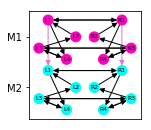

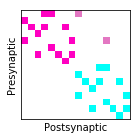

In [3]:
# a) Leech heartbeat

mm = np.array(
[
    [0,0,0,1],
    [1,0,0,0],
    [0,1,0,1],
    [0,0,1,0]
])
lr = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,1,0],
    [0,0,0,0]
])
imm = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]
)*2

fig, ax = plt.subplots(figsize=(2,2))
adj = create_adj_matrix(mm,lr,imm, modules=2)
adj[8:,8:] = adj[8:,8:]*3
G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
edge_colors = []
for (u,v) in G.edges():
    if u <= 7 and v >=8:
        edge_colors.append(colors["intermodule_connections"])
    else:
        edge_colors.append((0,0,0))
draw_graph(ax,
           adj, 
           colors=[module_colors[0], module_colors[-1]],
           m=4,
           node_size=100, 
           font_size=6, 
           arrow_size=5,
           edge_color=edge_colors
          )
savefig(fig,"1a")

# b) leech adj
fig, ax = plt.subplots(figsize=(2,2))
cmap = ListedColormap([colors['background'],module_colors[0],colors['intermodule_connections'], module_colors[-1]])
draw_adj(ax,adj,cmap=cmap)
# draw_adj(ax,adj)
savefig(fig,"1b")


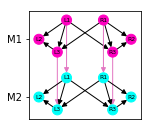

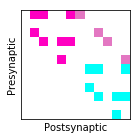

In [4]:
# c) c. elegans
mm = np.array(
[
    [0,1,1],
    [0,0,0],
    [0,1,0],

])
lr = np.array(
[
    [0,0,1],
    [0,0,0],
    [0,0,0],
])

imm = np.array(
[
    [1,0,0],
    [0,0,0],
    [0,0,1],

]
)*2
node_positions = np.array([
    [-1, 1.5], # L1
    [-2.5, 0], # L2
    [-1.5, -1], # L3
    [1, 1.5], # R1
    [2.5, 0], # R2
    [1.5, -1], # R3
]
)
fig, ax = plt.subplots(figsize=(2,2))
adj = create_adj_matrix(mm,lr,imm, modules=2)
adj[6:,6:] = adj[6:,6:]*3
G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
edge_colors = []
for (u,v) in G.edges():
    if u <= 5 and v >=6:
        edge_colors.append(colors["intermodule_connections"])
    else:
        edge_colors.append((0,0,0))
draw_graph(ax,
           adj, 
           colors=[module_colors[0], module_colors[-1]],
           node_positions=node_positions, 
           m=3,
           node_size=100, 
           font_size=6, 
           arrow_size=5,
           edge_color=edge_colors
          )
savefig(fig,"1c")

# b) leech adj
fig, ax = plt.subplots(figsize=(2,2))
cmap = ListedColormap([colors['background'],module_colors[0],colors['intermodule_connections'],module_colors[-1]])
draw_adj(ax,adj,cmap=cmap)
# draw_adj(ax,adj)
savefig(fig,"1d")

# Figure 2.

In [5]:
def get_phase_diff(r):
    phase = (r.c1 - r.c2) % (np.pi/2)
    return phase
def get_phase_fitness(r):
    
    fitness = np.abs(r.phase_diff-target_phase)
    return fitness
def get_phase_err_fitness(r):
    phase_err = get_phase_fitness(r)
    err = r.err1 + r.err2
    a = 0.5
    b = 10
    fitness = a*err + b*phase_err
    return fitness

In [10]:
s1_datafile = "sin_fit_results_df2_s0_f.pkl"
s1_datafiles = "data_s0_f"

s2_datafile = "sin_fit_results_df_s2_f_cfg.pkl"
s2_datafiles = "data_s2_s0_f_cfg"

s1_df = pd.read_pickle(s1_datafile)
# Filter s1 df
uniques = np.load('uniques2_s0_f_u.npy')
df = s1_df.copy()
df = df.loc[uniques,:]
df = df.query("abs(a) >= 1e-2")
# Filter out super low frequency waves -- usually bad fit
df = df.query("b > 1")
df['fitness'] = df.apply(lambda r: r.err/np.abs(r.a), axis=1)
s1_sorted = df.sort_values(by='fitness')

s2_df = pd.read_pickle(s2_datafile)
s2_df['fitness'] = -np.inf
s2_df['phase_diff'] = -np.inf
df = s2_df.copy()
df['phase_diff'] = df.apply(get_phase_diff,axis=1)
df = df.query("abs(a1) >= 1e-2 & abs(a2) >= 1e-2")
# Filter out super low frequency waves -- usually bad fit
# df = df.query("b1 > 2 & b2 > 2")
# We want the phase difference to be significant
# df = df.query("abs(c1 - c2) > 1")
# df = df.query("phase_diff > 0.3")
df = df.query("(a1 - a2) < 0.1 ")
df = df.query("(b1 - b2) < 0.1 ")
target_phase = np.pi/6


df['fitness'] = df.apply(get_phase_err_fitness , axis=1)
s2_sorted = df.sort_values(by='fitness')



In [62]:
tslc = slice(3000,4000)
def load_s1_file(row,datapath):
    fn = row.name
    params = tuple(row[['a','b','c','e']])
    with open(os.path.join(datapath,fn)) as fp:
        ret = pickle.load(fp)
    if len(ret['_metadata']) == 2:
        adj = create_adj_matrix(*ret['_metadata'])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    x = ret['motor_values']
    sp = ret['spikes'][0]
    
    xfit = refit(xfit)
    x = refit(x)
    
    return T,x,xfit,sp,adj,ret['_metadata']
def load_s2_file(row,datapath):
    fn = row.name
    
    with open(os.path.join(datapath,fn)) as fp:
        ret = pickle.load(fp)
    
    adj = create_adj_matrix(*ret['_metadata'], modules=2)
    params = tuple(row[['a1','b1','c1','e1']])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    ret['motor_values'] = np.array(ret['motor_values'])
    x1 = ret['motor_values'][:,0]
    x1fit = xfit
    x1 = x1
    
    params = tuple(row[['a2','b2','c2','e2']])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    x2 = ret['motor_values'][:,1]
    x2fit = xfit
    x2 = x2
    return T,x1,x1fit,x2,x2fit,adj
def plot_s1_graph(ax,adj):
    # Create graph
#     G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
#     G.add_node(8)
#     G.add_edge(0,8)
#     G.add_edge(4,8)
#     # Draw graph
#     modules = 1
#     m=4
#     with_labels=False
#     kwargs = {}
#     node_positions = np.array([
        
#         [-2,1.5], # L1
#         [-0.5,0], # L2
#         [-2.5,-1], # L3
#         [-1,-2], # L4
#         [2,1.5], # R1
#         [0.5,0], # R2
#         [2.5,-1], # R3
#         [1,-2], # R4
#         [0,2] # motor
#     ])

    
#     print(node_positions)
#     w = mcolors.to_rgba('gray')
    
#     nodecolors = [colors['l1_node'], w,w,w,colors['r1_node'],w,w,w,colors['motor_node']]
    
# #     nodecolors = [colors[0]]*8 + [colors[1]]*8
#     nx.draw_networkx(G, pos=node_positions,ax=ax,with_labels=False, node_color=nodecolors , **kwargs)
#     nx.draw_networkx_nodes(G.subgraph([8]),with_labels=False,pos={8:[0,2]},node_color=colors['motor_node'],node_shape='s')
    draw_graph(ax,adj,modules=1,colors=module_colors[[0,-1]])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    ax.axis('off')
def plot_s2_graph(ax,adj):
    # Create graph
#     G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
#     G.add_node(16)
#     G.add_edge(0,16)
#     G.add_edge(4,16)
#     G.add_node(17)
#     G.add_edge(8,17)
#     G.add_edge(12,17)
#     # Draw graph
#     modules = 2
#     m=4
#     with_labels=False
#     kwargs = dict(
#         node_size=100, 
#        font_size=6, 
#        arrow_size=5)
#     node_positions = np.array([
        
#         [-2,1.5], # L1
#         [-0.5,0], # L2
#         [-2.5,-1], # L3
#         [-1,-2], # L4
#         [2,1.5], # R1
#         [0.5,0], # R2
#         [2.5,-1], # R3
#         [1,-2], # R4
        
#     ])
#     node_positions = np.vstack([node_positions]*modules)
#     for i in range(1,modules):
#         node_positions[m*2*i:m*2*(i+1),1] -= 4.5*i
#     node_positions = np.concatenate((node_positions,[[0,2],[0,-2.5]]))
#     w = mcolors.to_rgba('gray')
    
    
#     nodecolors = [w]*16
#     mncolors = [colors['module1'],colors['module2']]
#     nodecolors.extend(mncolors)
#     print(node_positions)
    
#     nx.draw_networkx(G, pos=node_positions,ax=ax,with_labels=False, node_color=nodecolors , **kwargs)
#     nx.draw_networkx_nodes(G.subgraph([16,17]),with_labels=False,pos={16:[0,2],17:[0,-2.5]},node_color=mncolors,node_shape='s',**kwargs)
    draw_graph(ax,adj,modules=2,colors=module_colors[[0,-1]],arrow_colors=module_colors[-1])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([-3,3])
    ax.set_ylim([-8,3])
    ax.axis('off')
def plot_s1_out(ax,T,x,xfit, tslc):
    ax.plot(T[tslc],x[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],xfit[tslc], color=module_colors[0], alpha=0.5, lw=2)
    ax.set_xlabel('Time (s)', )
    ax.set_ylabel('Motor value (u)',)
def plot_s2_out(ax,T,x1,x1fit,x2,x2fit, tslc):
    ax.plot(T[tslc],x1[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],x1fit[tslc], color=module_colors[0], alpha=0.5, lw=2)
    ax.plot(T[tslc],x2[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],x2fit[tslc], color=module_colors[-1], alpha=0.5, lw=2)
    ax.set_xlabel('Time (s)', )
    ax.set_ylabel('Motor value (u)',)
def plot_s1_spikes(ax,T,sp,tslc,cmap=None):
    bt = T[tslc][0]
    et = T[tslc][-1]
    bi = -0.5
    ei = sp.shape[1]-0.5
    
    ax.imshow(sp[tslc,:].T, aspect='auto',extent=[bt,et,ei,bi],cmap=cmap)
    ax.set_yticks(range(sp.shape[1]))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Neuron')

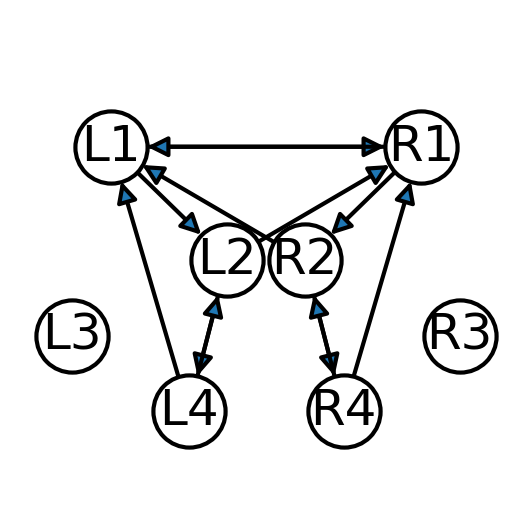

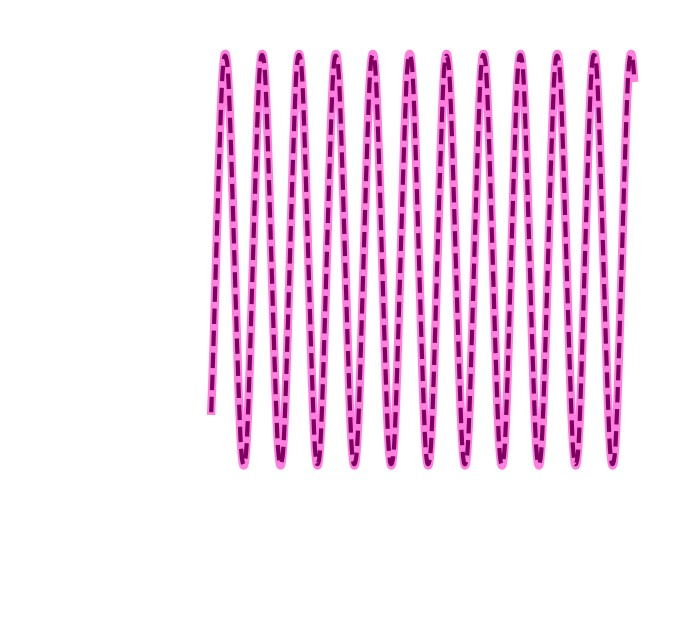

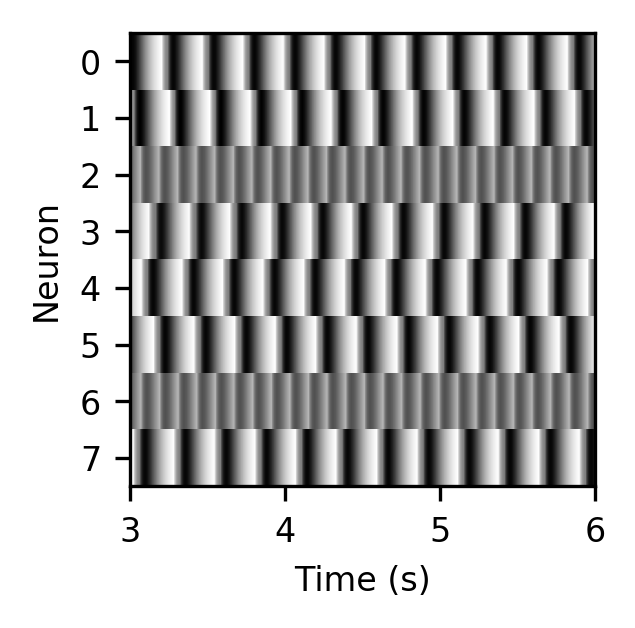

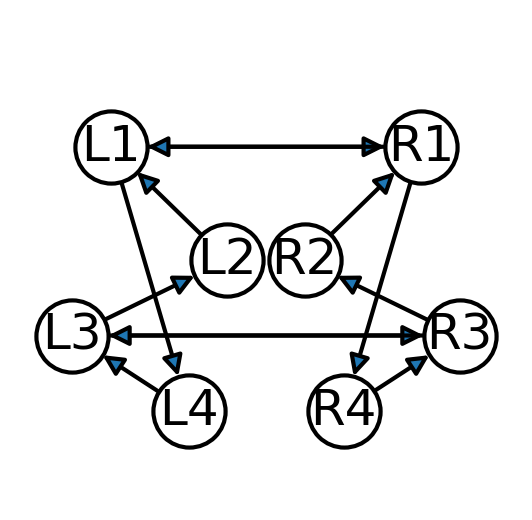

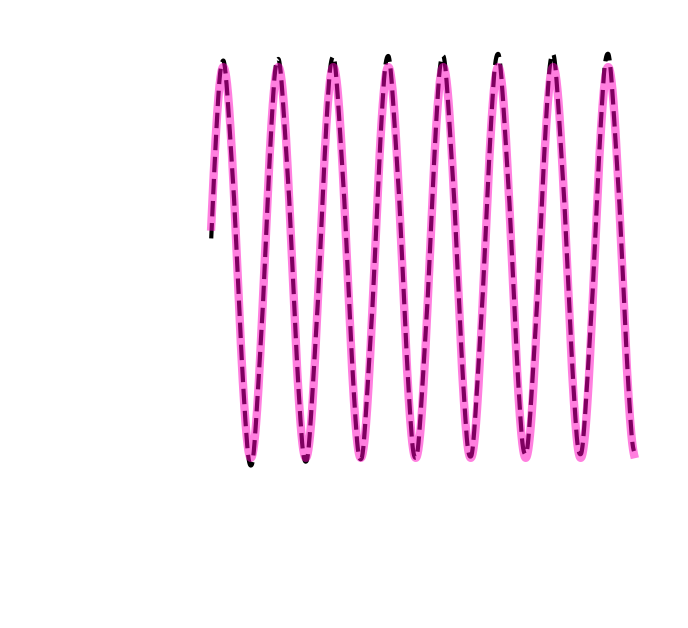

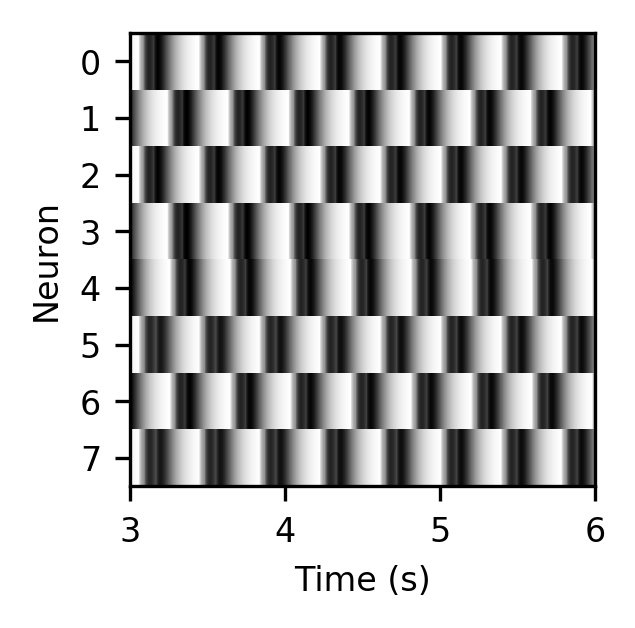

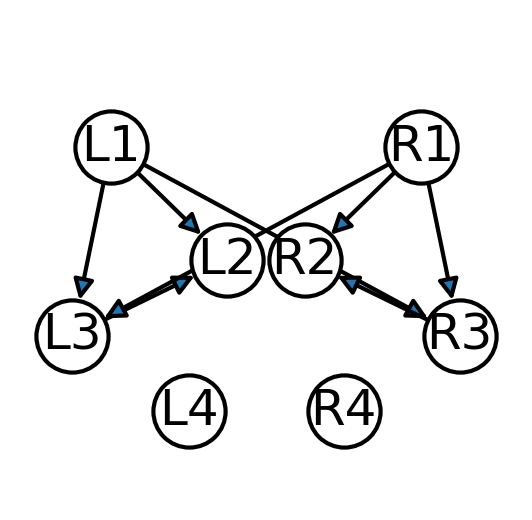

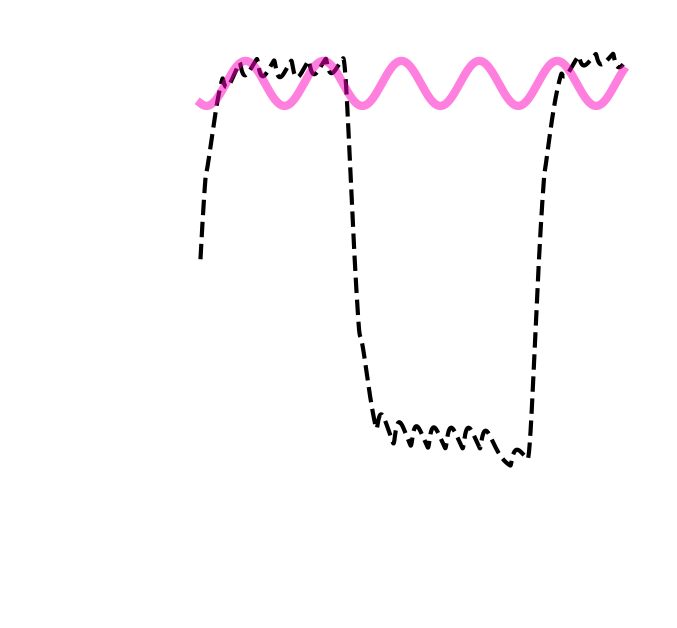

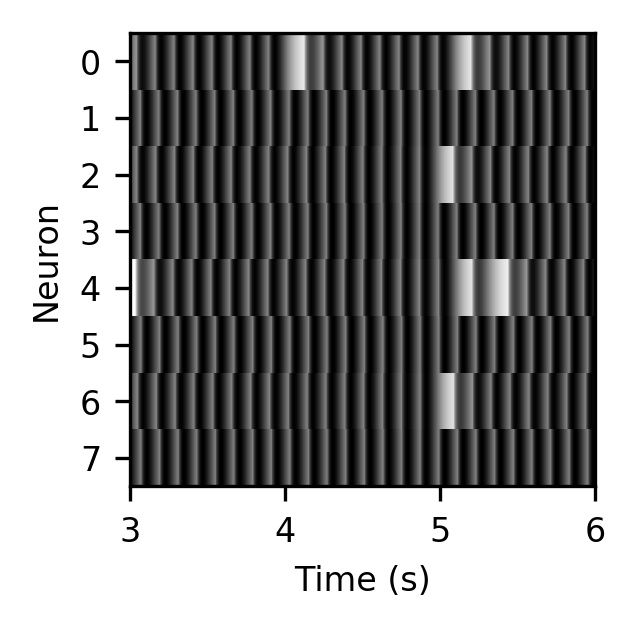

In [63]:
# a,b
tslc = slice(3000,6000)
fn = s1_sorted.iloc[0]
T,x,xfit,sp,adj,_ = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2))
plot_s1_graph(ax,adj)
savefig(fig,"s1_top_graph")
ax.axis('off')
savefig(fig,"s1_top_graph_nax")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"s1_top_output")
ax.axis('off')
savefig(fig,"s1_top_output_nax")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_spikes(ax,T,sp,tslc,'binary')
savefig(fig,"s1_top_spikes")

# c,d
# fn = s1_sorted.iloc[99]
# Leech heart
fn = s1_sorted.loc['oRcLcZcqfYfQcWcqcDcofqcXcOcncxfZcgfLc7cocrcpcVc8cRc1cWfjcQc7c6cE.pkl']
T,x,xfit,sp,adj,_ = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2))
plot_s1_graph(ax,adj)
savefig(fig,"leech_structure")
ax.axis('off')
savefig(fig,"leech_structure_nax")


fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"leech_output")
ax.axis('off')
savefig(fig,"leech_output_nax")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_spikes(ax,T,sp,tslc,'binary')
savefig(fig,"s1_leech_spikes")
# e,f
fn = s1_sorted.iloc[-20]
fn = s1_sorted.loc['mRcjfGfmcQc8cxc3cWcKfpc2c9cmcPckc8cGcOf6cxcncMc2cNcXcocWcycqc7c2.pkl']
T,x,xfit,sp,adj,_ = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2),tight_layout=False)
plot_s1_graph(ax,adj)
savefig(fig,"celegans_structure",bbox_inches=None)
ax.axis('off')
savefig(fig,"celegan_structure_nax")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"celegans_output",bbox_inches=None)
ax.axis('off')
savefig(fig,"celegan_output_nax")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_spikes(ax,T,sp,tslc,'binary')
savefig(fig,"s1_celegans_spikes")

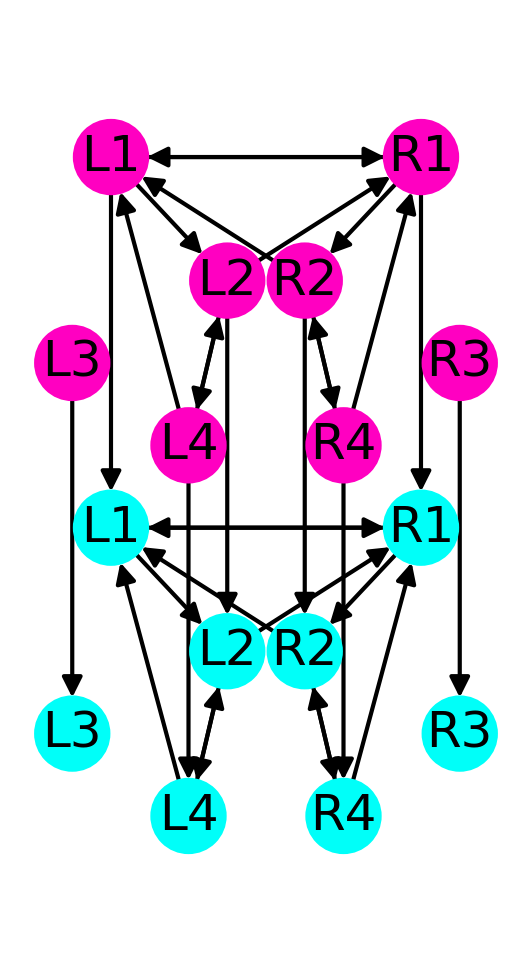

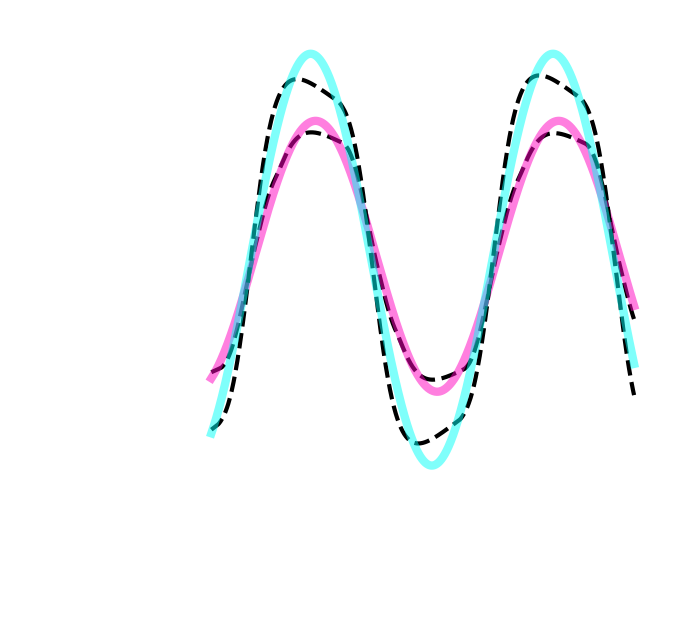

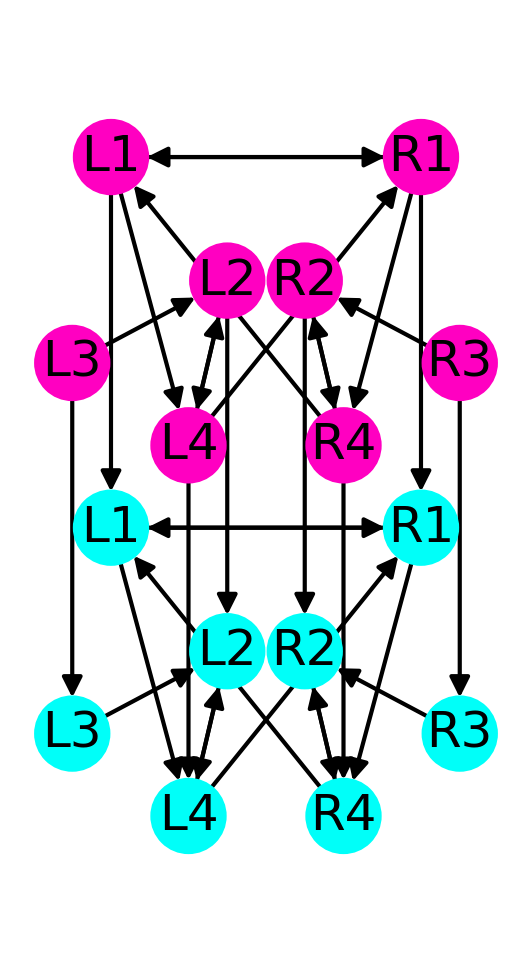

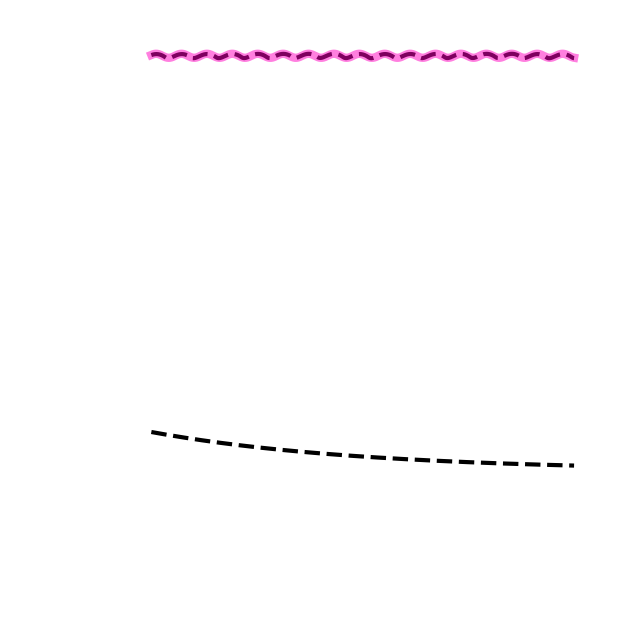

In [70]:
#g,h
tslc = slice(3000,5000)
fn = s2_df.loc["oRcrfZc8c4cQcWcWfDcOcqcXc7f8fQcZcgfLc7cocYfpcVc8cRc1crcjcQc7c6cEc0cLcocjcwcBcMcXcZcRcncEc9cGcDcq.pkl"]

T,x1,x1fit,x2,x2fit,adj = load_s2_file(fn, s2_datafiles)
fig,ax = plt.subplots(figsize=(2,4))
plot_s2_graph(ax,adj)
savefig(fig,"2g")
ax.axis('off')
savefig(fig,"2g_nax")

fig,ax = plt.subplots(figsize=(2,2))
plot_s2_out(ax,T,x1,x1fit,x2,x2fit,tslc)
savefig(fig,"2h")
ax.axis('off')
savefig(fig,"2h_nax")


fn = s1_sorted.iloc[99]
T,x,xfit,sp,adj,met = load_s1_file(fn, s1_datafiles)
imm = np.zeros((4,4))
imm[0,0] = 0.02
# imm[0,0] = 1
s1met = (met[0],met[1],imm)
hsh = "{}.pkl".format(make_hash(s1met))

fn = s2_df.loc[hsh]

T,x1,x1fit,x2,x2fit,adj = load_s2_file(fn, s2_datafiles)
fig,ax = plt.subplots(figsize=(2,4))
plot_s2_graph(ax,adj)
savefig(fig,"2i")
ax.axis('off')
savefig(fig,"2i_nax")
fig,ax = plt.subplots(figsize=(2,2))
plot_s2_out(ax,T,x1,x1fit,x2,x2fit,tslc)
savefig(fig,"2j")
ax.axis('off')
savefig(fig,"2j_nax")

1434
43950


/home/raph/.local/lib/python2.7/site-packages/mpl_toolkits/axes_grid1/inset_locator.py:489: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0,0,1,1) now.
  warnings.warn("Using the axes or figure transform requires a "


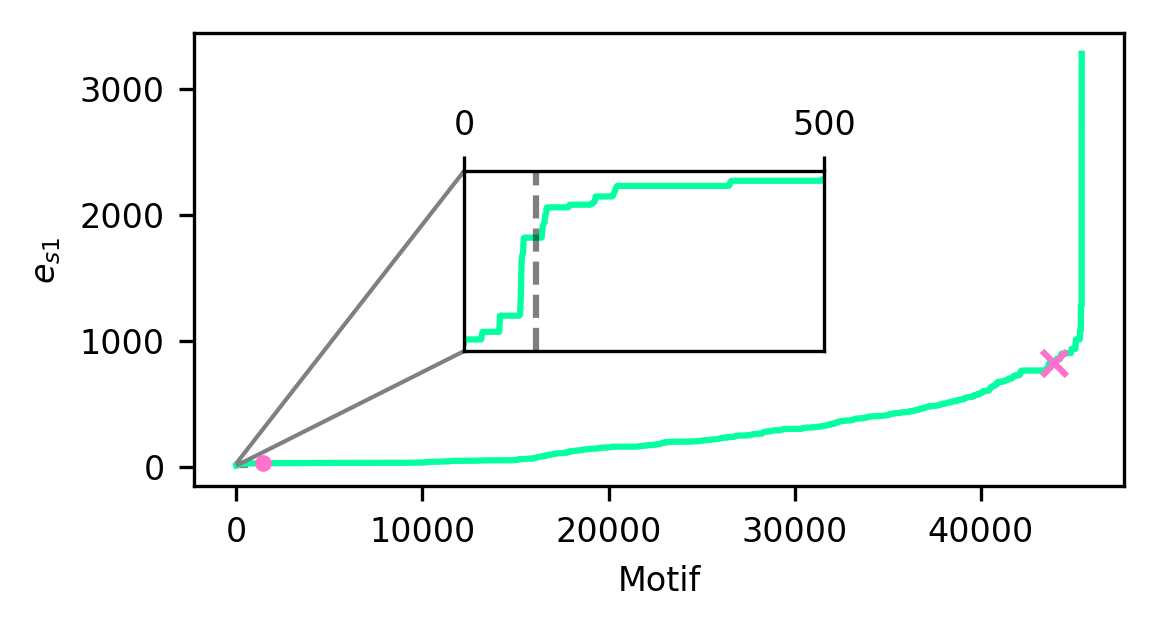

In [68]:
# l
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=(4,2))
lh = s1_sorted.loc['oRcLcZcqfYfQcWcqcDcofqcXcOcncxfZcgfLc7cocrcpcVc8cRc1cWfjcQc7c6cE.pkl']
lh_x = s1_sorted.index.get_loc(lh.name)
print(lh_x)
lh_y = lh.fitness


ce = s1_sorted.loc['mRcjfGfmcQc8cxc3cWcKfpc2c9cmcPckc8cGcOf6cxcncMc2cNcXcocWcycqc7c2.pkl']
ce_x = s1_sorted.index.get_loc(ce.name)
print(ce_x)
ce_y = ce.fitness


y = s1_sorted['fitness'].to_numpy()
x = np.arange(len(y))
ebreak_idx = 100
ax.set_xlabel('Motif')
ax.set_ylabel('$e_{s1}$')
# ax.legend([l],['Cutoff'])
# ax.title.set_text('Fitness cutoff')

axins = inset_axes(ax, '30%','30%' , loc=10, bbox_transform=ax.figure.transFigure)

ax.plot(x, y,color=colors['compare'])
insx = 500
axins.plot(x[:insx], y[:insx],color=colors['compare'])
ax.scatter(lh_x,lh_y, color=colors['compare2'],marker='.',zorder=3)
ax.scatter(ce_x,ce_y, color=colors['compare2'],marker='x',zorder=3)
axins.set_xlim(0, insx) # apply the x-limits
# axins.set_ylim(0, 2000) # apply the y-limits
l = axins.axvline(ebreak_idx, ls='--', color='k', alpha=0.5)

axins.set_xticks([0,insx])
axins.xaxis.tick_top()
axins.set_yticks([])
mark_inset(ax, axins, loc1=3, loc2=2, fc="none", ec="0.5")

# ax.set_xscale('log')
savefig(fig,"sorted_fitness_step1")

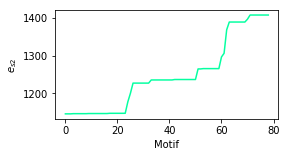

In [39]:
fig, ax = plt.subplots(figsize=(4,2))
ax.plot(s2_sorted['fitness'].to_numpy(),color=colors['compare'])
# ebreak_idx = 50
# l = ax.axvline(ebreak_idx, ls='--', color='r', alpha=0.5)
ax.set_xlabel('Motif')
ax.set_ylabel('$e_{s2}$')
# ax.title.set_text('Sorted fitness (step 2)')
savefig(fig,"sorted_fitness_step2")

In [44]:

best_performer = '/home/raph/cpg_search/top_preformer_041221_210202.pkl'
def create_best_performer(modules,**kwargs):
    with open(best_performer) as fp:
        metadata = pickle.load(fp)

    mm,lr,imm = metadata[0]
    imm = imm*0.02
    lr = lr
    mm = mm


    N = modules
    defaults = dict(
        neuron_type=nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)
    )


    model,mn, probes1 = generate_nengo_model(
        mm,
        lr,
        imm, 
        modules=N,
        generate_probes=True,
    #     generate_probes=False,
        crop=None, 
        defaults=defaults,
        imm_synapse=nengo.Alpha(0.05),
        w_synapse=nengo.Alpha(0.02),
        **kwargs
    )
    

    adj = create_adj_matrix(mm,lr,imm,modules=N)
    return model,mn,probes1, adj, mm, lr,imm
def run_simple(model):
    with nengo.Simulator(model, seed=0,dt=0.003) as sim:

        for i,ens in enumerate(model.ens):
            signal = sim.model.sig[ens.neurons]
            sim.signals[signal['voltage']][:4] = np.ones(4)
    #         if i == 0:
    #             break

        sim.run(6)
    return sim



# Best performer viz

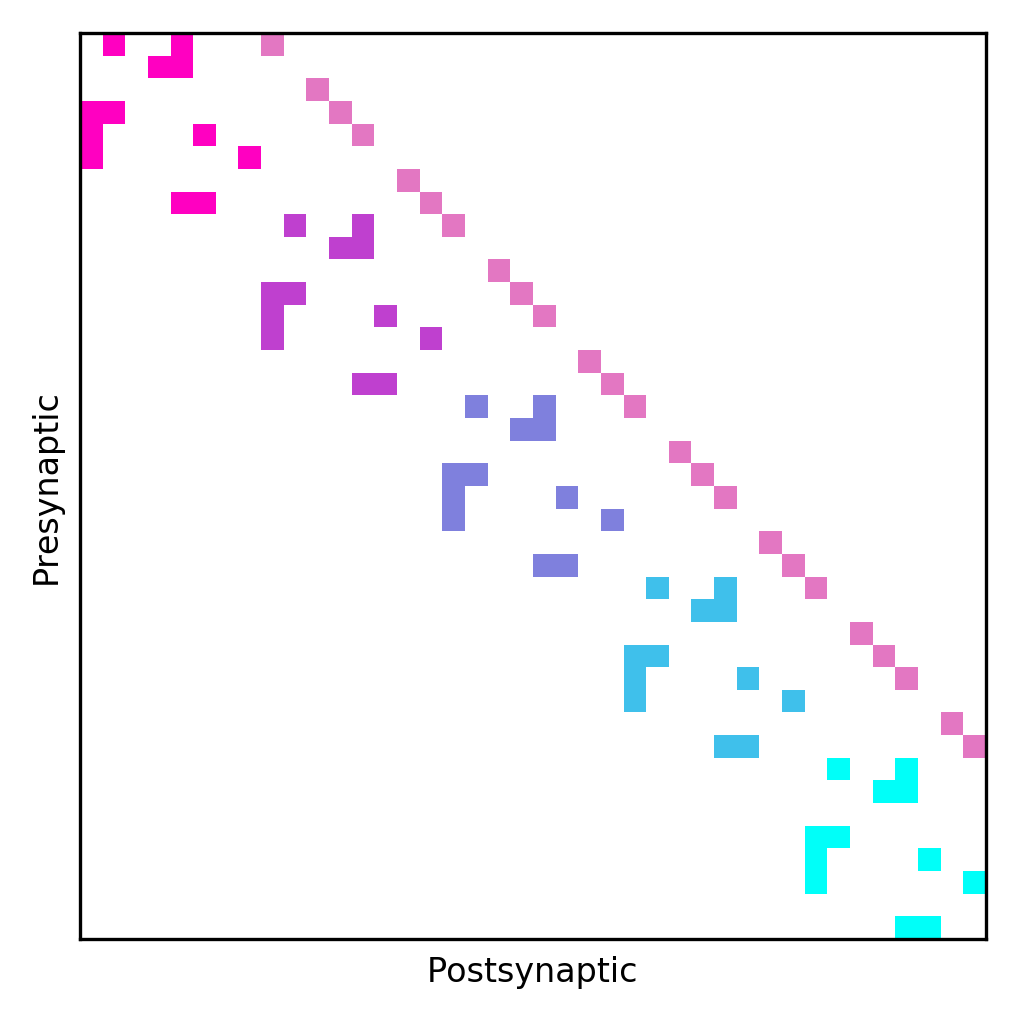

In [259]:
modules=5
model, mn,probes,adj, mm, lr,imm = create_best_performer(modules)
ccs = [
    colors['background'],
    mcolors.to_rgba('gray'),
    colors['intermodule_connections'], 
    
    
    
]
ccs.extend(module_colors)
cmap = ListedColormap(ccs)

nn = 8
n = 4

new_adj = adj.copy()
new_adj[0:8,0:8] = adj[0:8,0:8]*3
new_adj[0:8,8:16] = adj[0:8,8:16]*50*2

for i in range(1,modules):
    bi = (i-1)*nn
    mi = nn*i
    ei = nn*(i+1)
    new_adj[bi:mi,mi:ei] = adj[bi:mi,mi:ei]*50*2
    if i < 5:
        new_adj[mi:ei, mi:ei] = adj[mi:ei, mi:ei]*(i+3)
fig, ax = plt.subplots()
im = draw_adj(ax, new_adj, cmap=cmap)
savefig(fig,'best_performer_adj')
# plt.colorbar(im,ax=ax)

(-22.2575, 3.7575000000000003)


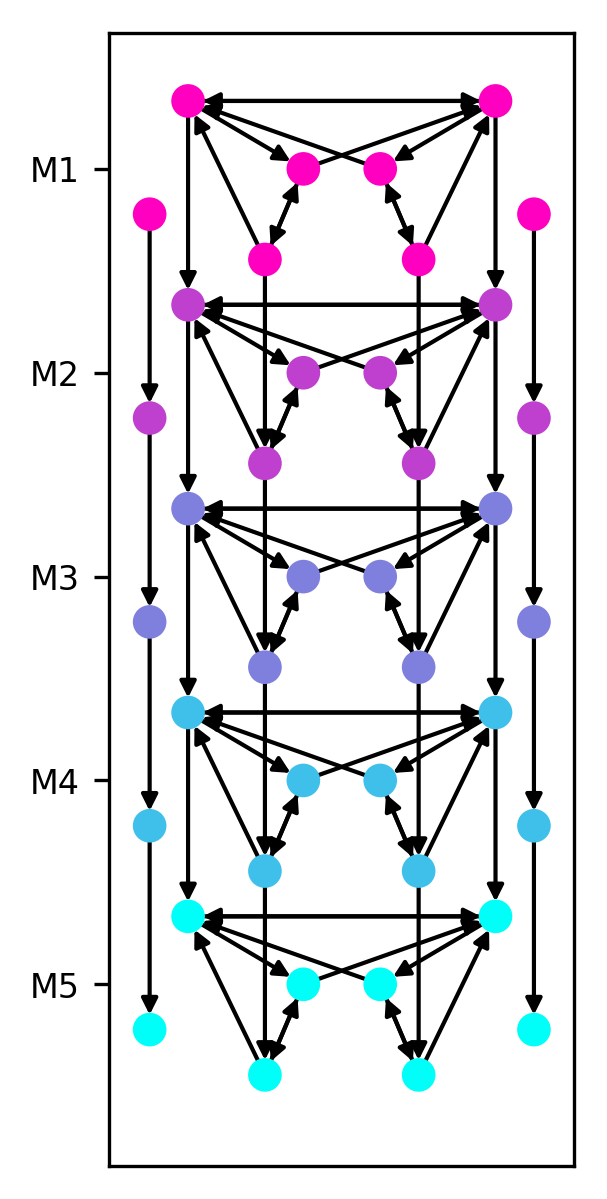

In [260]:
w = mcolors.to_rgba('gray')
N = modules
ncolors=copy(module_colors)
try:
    ws = np.hstack([w]*(N-5))
    ncolors = np.hstack(ncolors, ws)
except:
    pass

fig,ax = plt.subplots(dpi=300,figsize=(2,N) )
draw_graph(ax,adj, modules=N,colors=ncolors, with_labels=False,node_size=50,arrowsize=8)
print(ax.get_ylim())
ax.set_ylim(-4*N-2,3)
savefig(fig, "best_performer_graph")

# Compliance figures
## Baseline

In [261]:
model,mn, probes, adj, mm, lr,imm = create_best_performer(modules,motor_probe_filter=None)
sim = run_simple(model)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

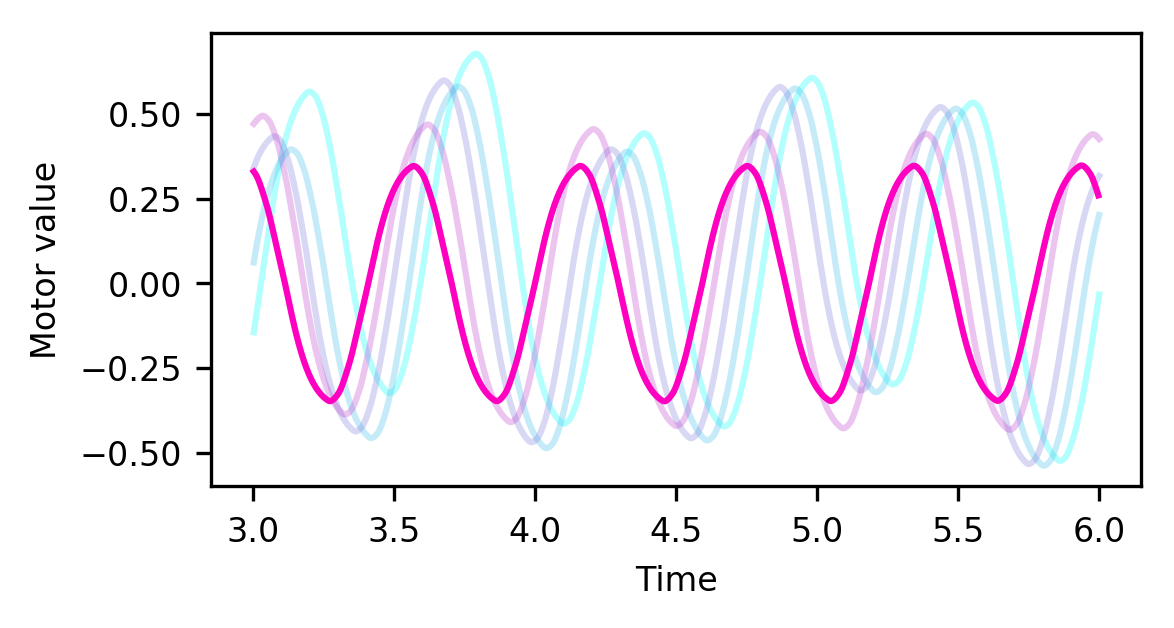

In [262]:
fig,ax = plt.subplots(figsize=(4,2),dpi=300)
begin_time=3
plot_output_compliance(ax, mn,begin_time,sim,it=[4,3,2,1,0],insert_time=None,lcolors=module_colors)
savefig(fig,'best_performer_baseline')

    
baseline_output = np.array(mn.rets[1:])
# fig.savefig('./figures/2k.pdf')

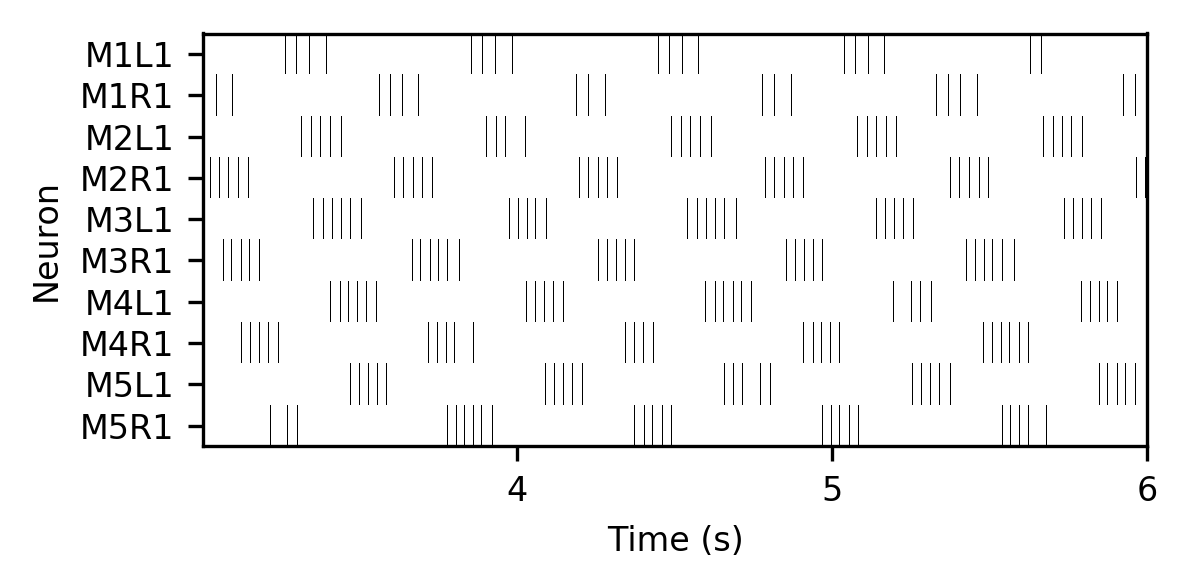

In [263]:
fig, axs = plt.subplots(figsize=(4,2),dpi=300)
plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,colorbar=False,cmap='binary')
savefig(fig,'best_performer_spikes')

## Inhibitory current into L1/R1

In [264]:
model, mn, probes, adj, mm, lr, imm = create_best_performer(5, inp_conn_type='standard',motor_probe_filter=None)
insert_time = 4.5

def test_torque_decoding(t,x,ret,dr):
    ret = np.zeros(N*2)
    if t > insert_time:
        for i in range(N):
            
            ret[i*2] = -0.4
            ret[i*2+1] = -0.4
            if i==0:
                break
    return ret
            
            
mn.return_fn = test_torque_decoding
inp_probes = []
with model:
    for ens in model.ens:
        
        inp_probes.append(nengo.Probe(ens.neurons, 'input'))




In [265]:
sim = run_simple(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

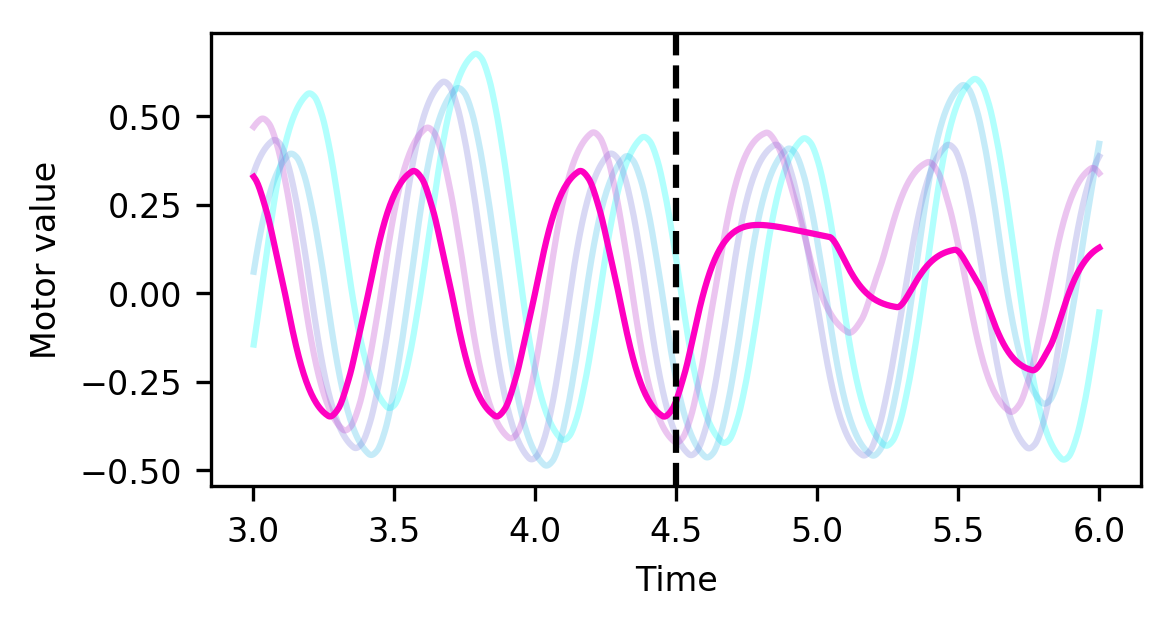

In [266]:
fig,ax =plt.subplots(figsize=(4,2),dpi=300)
plot_output_compliance(ax,mn,begin_time, sim,it=np.arange(4,-1,-1),insert_time=insert_time,lcolors=module_colors)
savefig(fig,'inhib_current_l1r1_output')

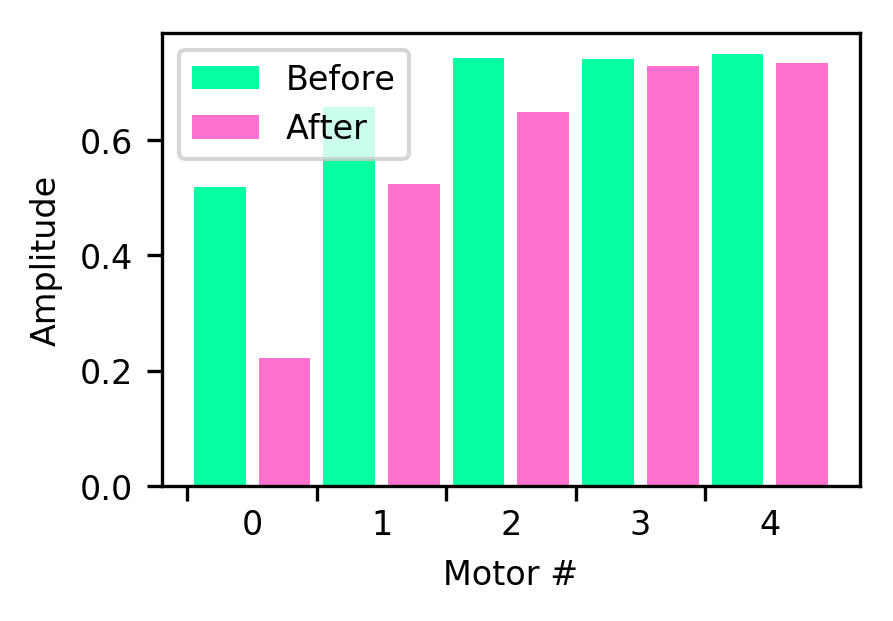

In [267]:
fig,ax = plt.subplots(figsize=(3,2))
plot_before_after_bar(ax,mn,begin_time, sim,insert_time,np.arange(5),baseline_output,colors=[colors['compare'],colors['compare2']])
savefig(fig, 'inhib_current_l1r1_bar')

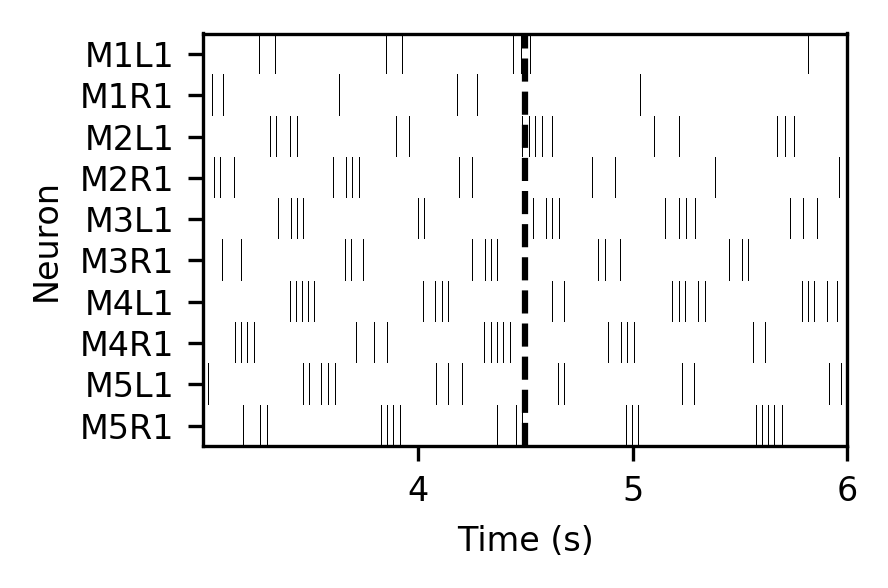

In [268]:
fig, axs = plt.subplots(figsize=(3,2))
plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,insert_time,colorbar=False,cmap='binary')
savefig(fig, 'inhib_current_l1r1_spikes')

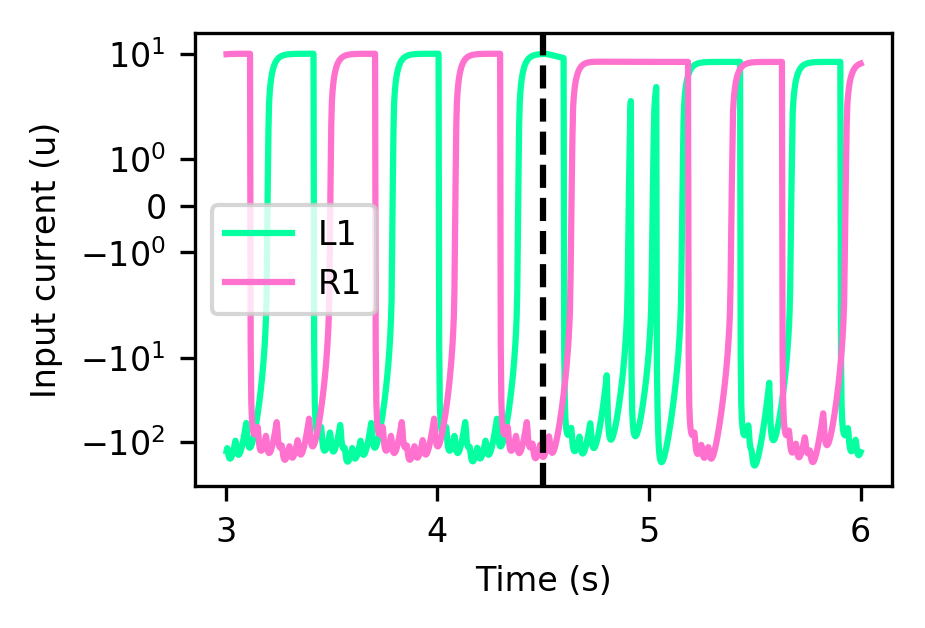

In [269]:
fig, ax = plt.subplots(figsize=(3,2))
plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time,colors=[colors['compare'],colors['compare2']])
savefig(fig, 'inhib_current_l1r1_inp')


In [270]:
def run_compliance_exp(tau, alpha, method=([0,1,0,1],[1,0,1,0])):
    model, mn, probes, adj, mm, lr, imm = create_best_performer(5,inp_conn_type='advanced', tau=tau, alpha=alpha,motor_probe_filter=None)
    negative_alpha = lambda  tau,alpha : nengo.LinearFilter([-alpha,1], [tau ** 2, 2*tau, 1])
    strong_alpha = lambda  tau,alpha : nengo.LinearFilter([alpha,1], [tau ** 2, 2*tau, 1])
    strong_alpha = strong_alpha(tau,alpha)
    negative_alpha = negative_alpha(tau,alpha)
    inp_probes = []
    tf = -1
    begin_time = 3
    insert_time = 4.5
    N = len(probes)
    def test_torque_decoding(t,x,r,dr):
        ret = np.zeros(N*4)
        trq = -1
        sc = -0.4

        if t > insert_time:
            for i in range(N):
#                 val = [-1,1,-1,1] if dr[i] < 0 else [1,-1,1,-1]
                val = method[0] if dr[i] < 0 else method[1]
                val = np.array(val)*sc*trq
                ret[i*4] = val[0]
                ret[i*4+1] = val[1]
                ret[i*4+2] = val[2]
                ret[i*4+3] = val[3]
                if i==0:
                    break


        return ret
    mn.return_fn = test_torque_decoding
    
    with model:
        for ens in model.ens:
            inp_probes.append(nengo.Probe(ens.neurons,'input'))


 
    x = np.zeros(500)
    t = np.linspace(.0,0.5,500)

    x[50:] = 1
    fig,ax = plt.subplots(figsize=(3,2))
    ax.plot(t,negative_alpha.filt(x),color=colors['compare'])
    ax.plot(t,strong_alpha.filt(x), color=colors['compare2'])
    ax.plot(t,x,color='k')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Output')
    ax.legend([r'$\alpha = -{}$'.format(alpha),r'$\alpha = {}$'.format(alpha)],loc=1)
    ax.title.set_text(r'$\tau={}$'.format(tau))
    savefig(fig,'synapse_filter_t%ia%i_m%s_step_resp' %(tau*1000,alpha*1000,str(method)))

    sim = run_simple(model)
    fig,ax =plt.subplots(figsize=(3,2),dpi=300)
    plot_output_compliance(ax,mn,begin_time, sim,it=np.arange(4,-1,-1),insert_time=insert_time,lcolors=module_colors)

    savefig(fig,'inhib_current_filt_t%ia%i_m%s_output'%(tau*1000,alpha*1000,str(method)))
    
    
    
    fig, ax = plt.subplots(figsize=(3,2))
    plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time,colors=[colors['compare'],colors['compare2']])
    savefig(fig, 'inhib_current_filt_t%ia%i_m%s_inp'%(tau*1000,alpha*1000,str(method)))
    
    fig, axs = plt.subplots(figsize=(3,2))
    plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,insert_time,cmap='binary',colorbar=False)
    savefig(fig, 'inhib_current_filt_t%ia%i_m%s_spikes'%(tau*1000,alpha*1000,str(method)))
    
    fig,ax = plt.subplots(figsize=(3,2))
    plot_before_after_bar(ax,mn,begin_time, sim,insert_time,np.arange(5),baseline_output,colors=[colors['compare'],colors['compare2']] )
    savefig(fig, 'inhib_current_filt_t%ia%i_m%s_bar'%(tau*1000,alpha*1000,str(method)))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

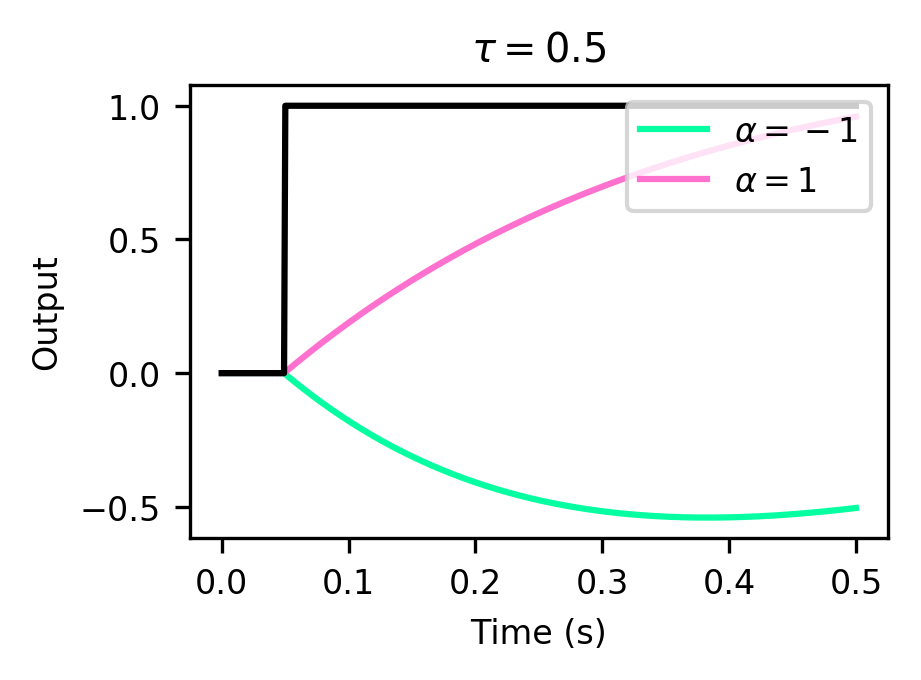

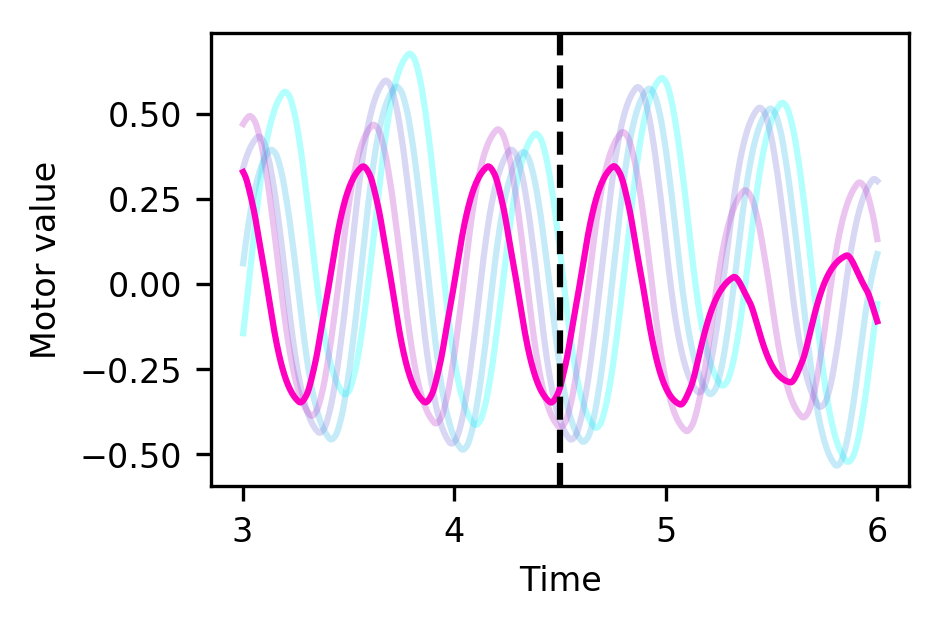

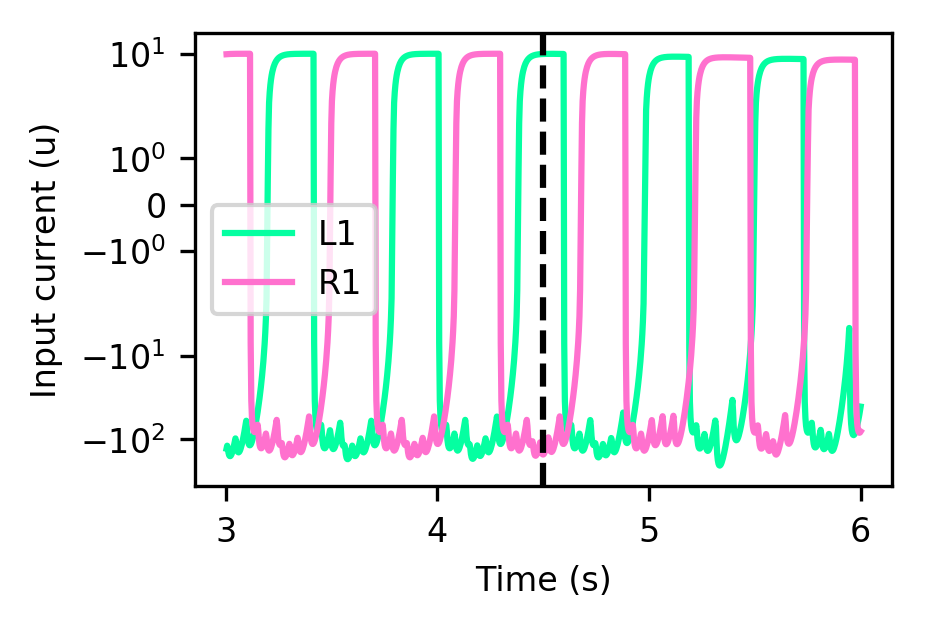

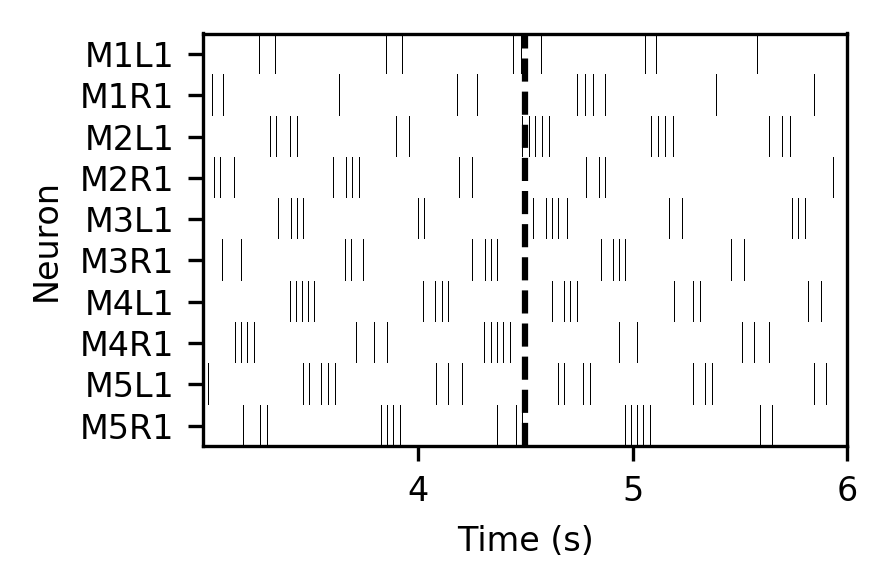

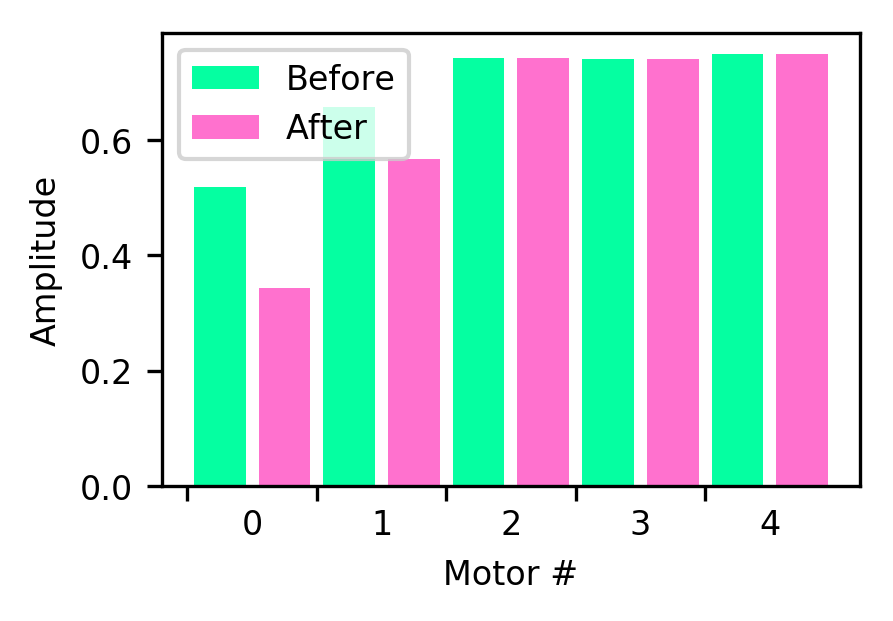

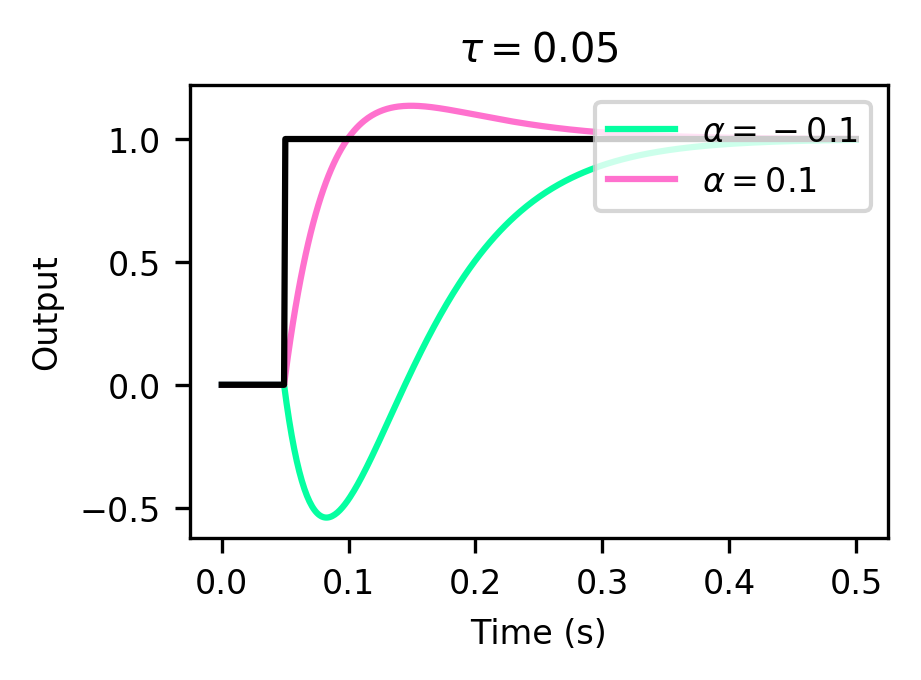

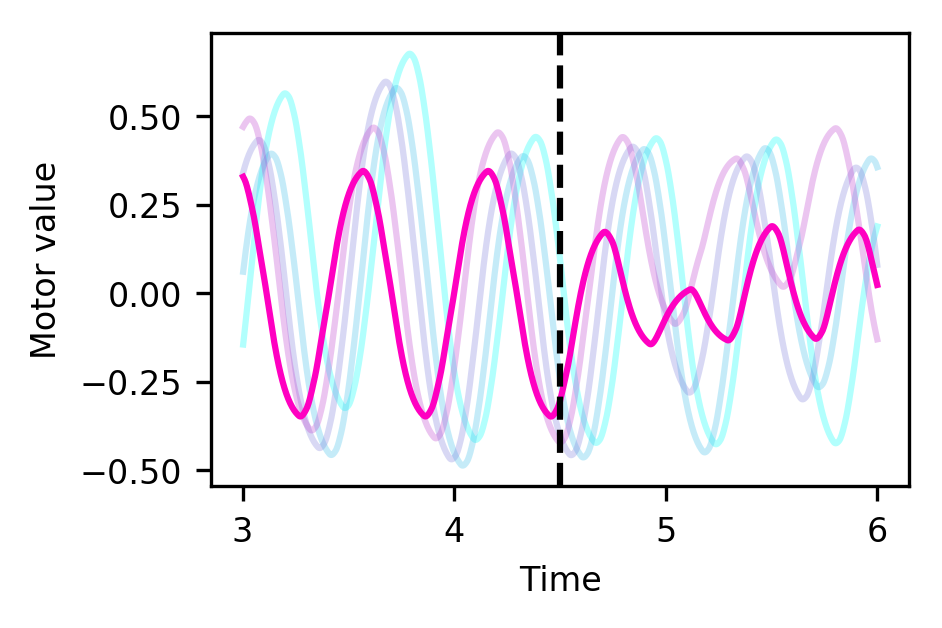

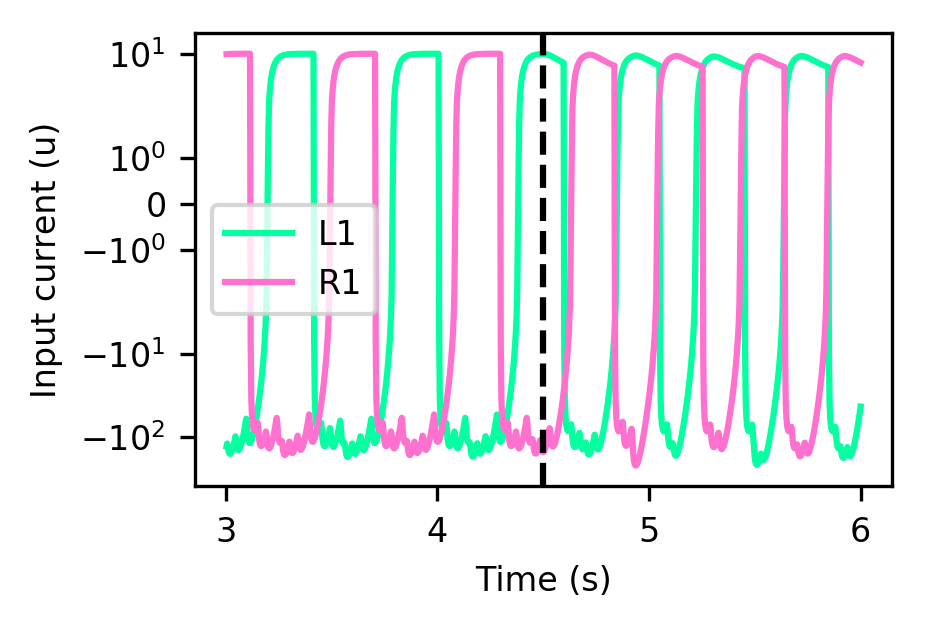

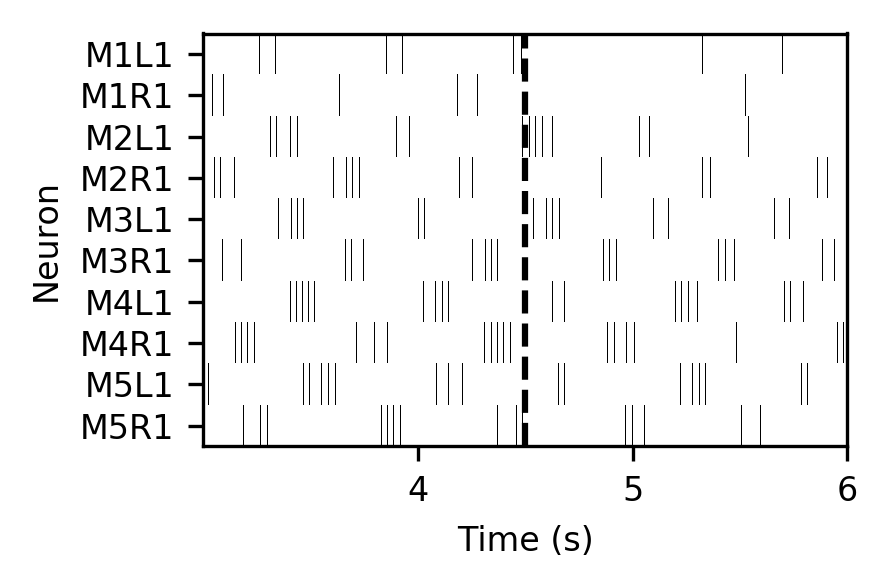

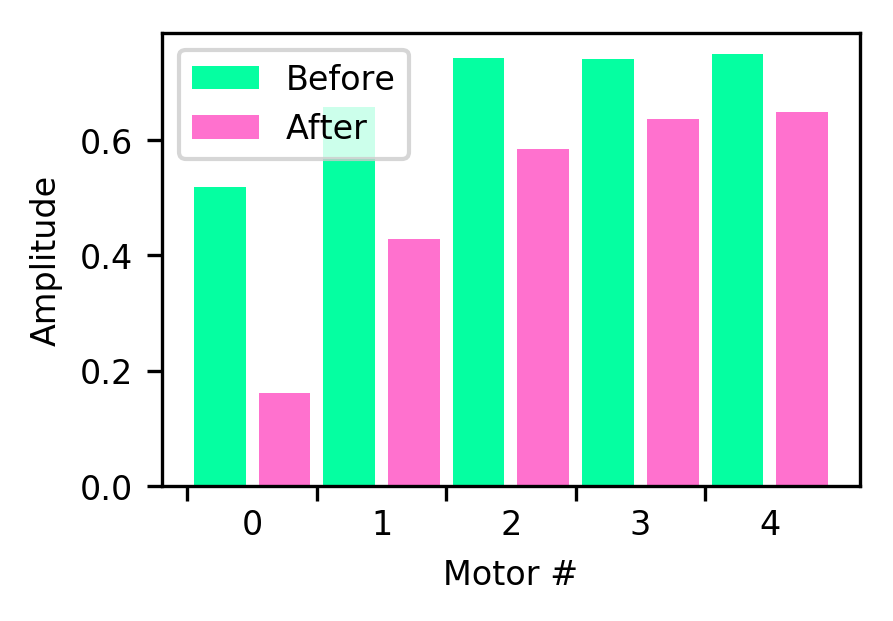

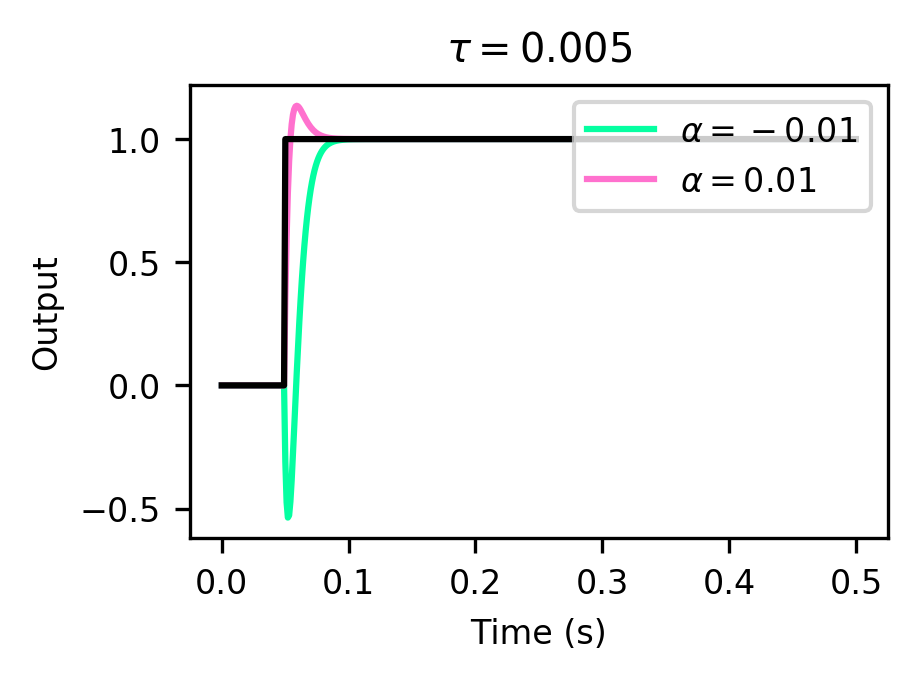

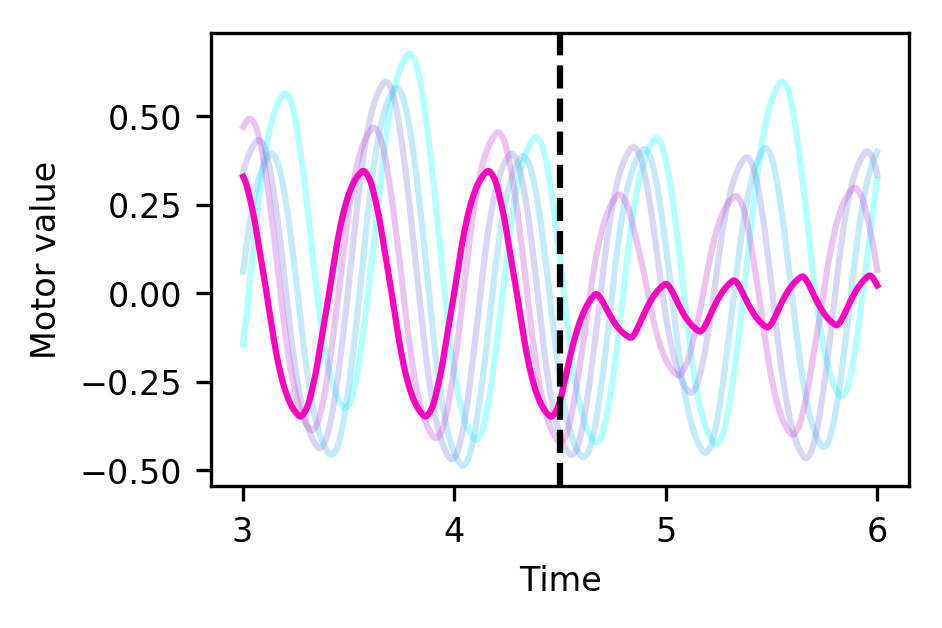

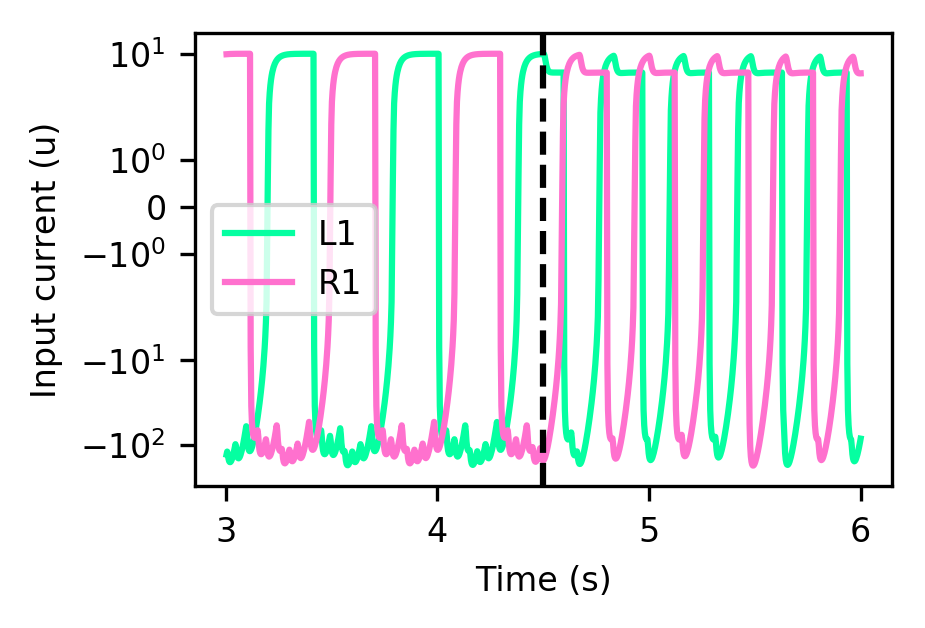

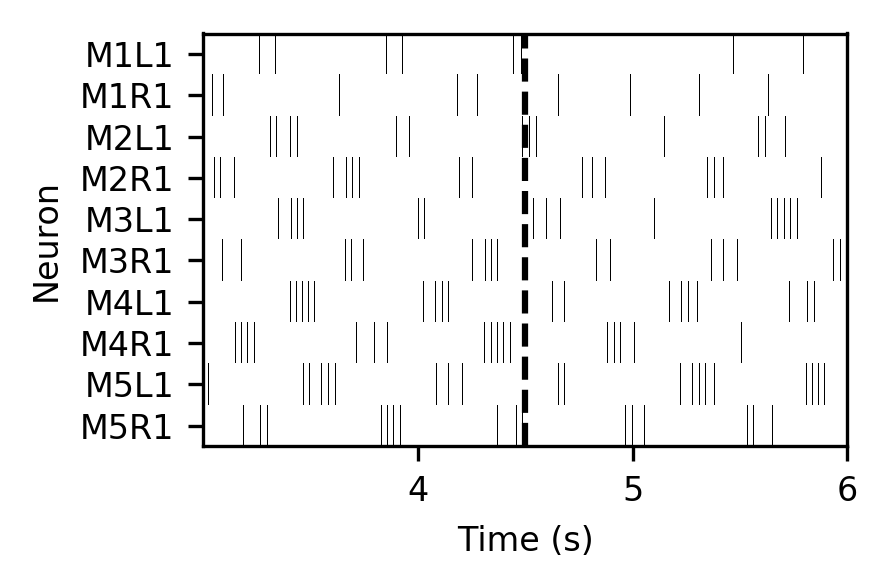

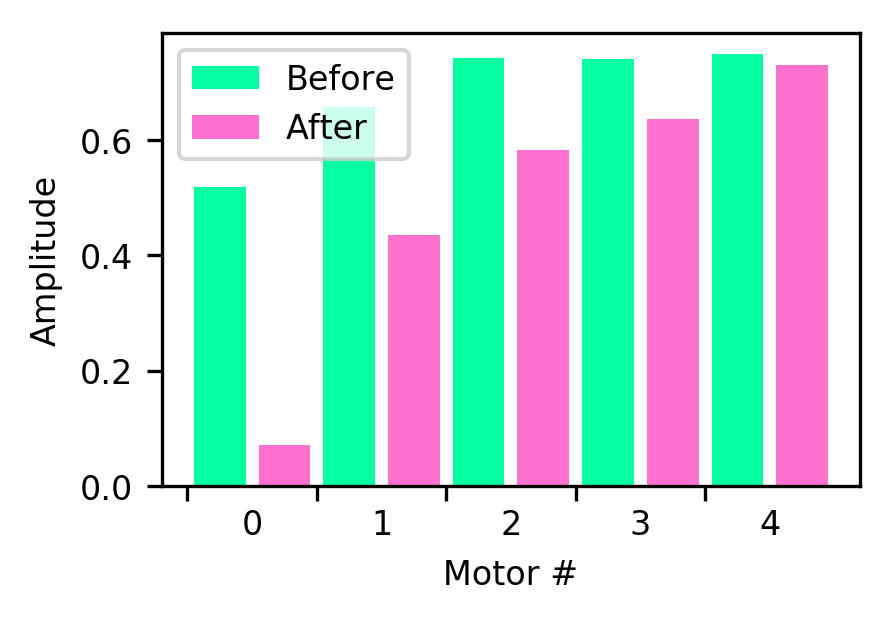

In [271]:
alphas = [1,0.1,0.01]
taus = [0.5,0.05,0.005]
for tau, alpha in zip(taus,alphas):
    run_compliance_exp(tau, alpha)
# for tau, alpha in zip(taus,alphas):
#     run_compliance_exp(tau, alpha,method=([-1,1,-1,1],[1,-1,1,-1]))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

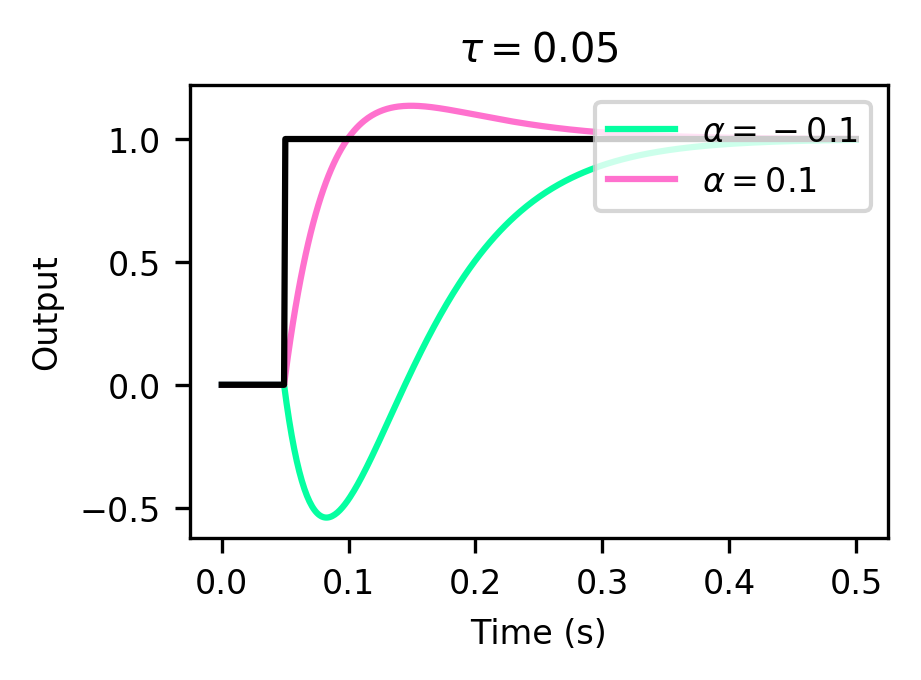

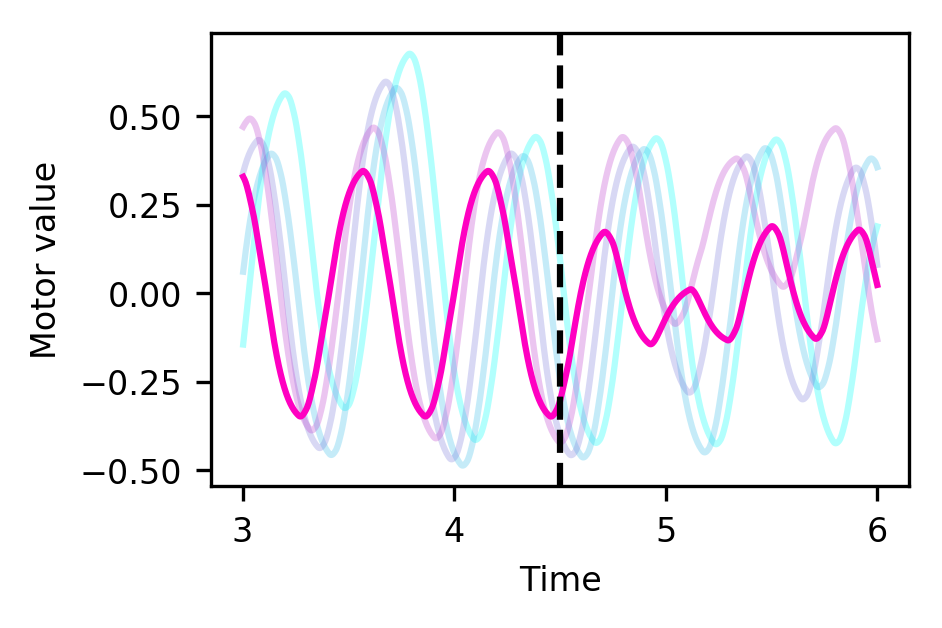

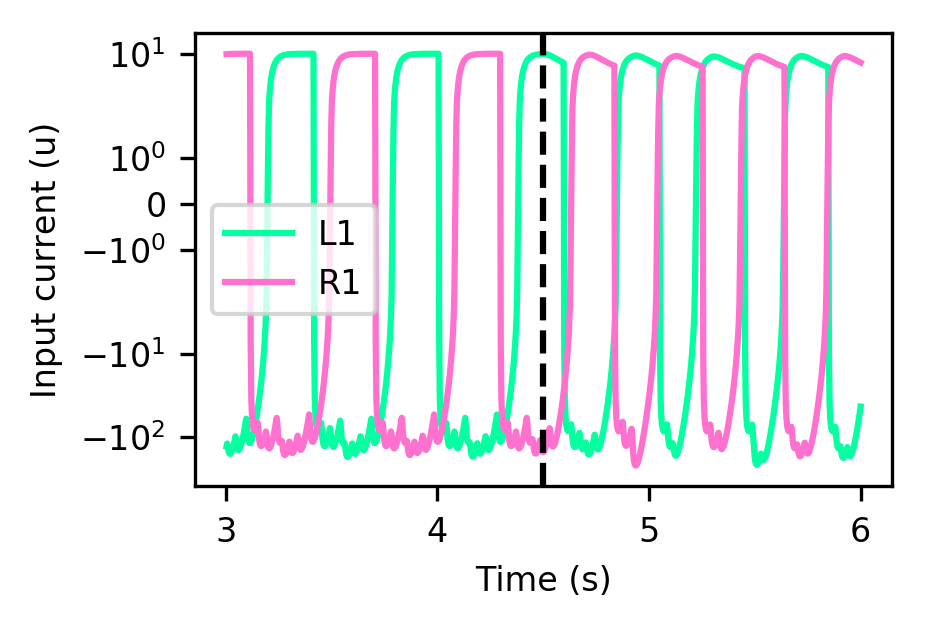

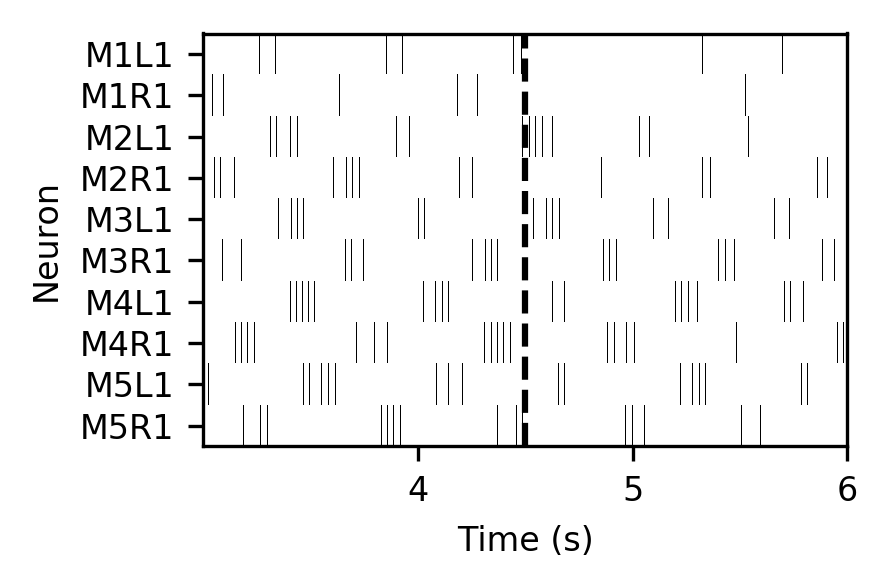

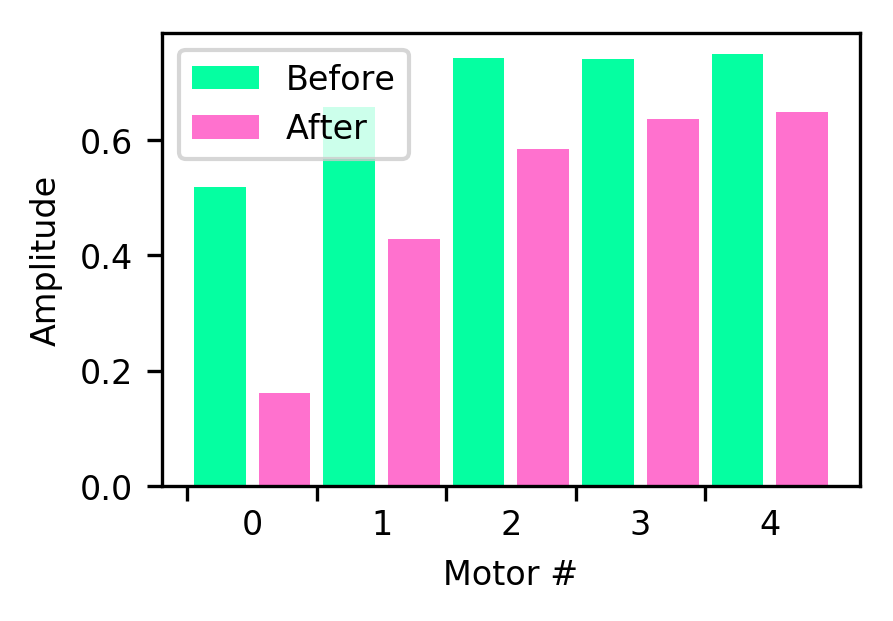

In [272]:
run_compliance_exp(0.05, 0.1,)

In [273]:
def run_turning_exp(tau, alpha, method=([0,1,0,1],[1,0,1,0])):
    model, mn, probes, adj, mm, lr, imm = create_best_performer(5,inp_conn_type='advanced', tau=tau, alpha=alpha, motor_probe_filter=None)
    
    inp_probes = []
    tf = -1
    begin_time = 3
    insert_time = 4.5
    N = len(probes)
    def test_torque_decoding(t,x,r,dr):
        ret = np.zeros(N*4)
        trq = -1
        sc = 0.4

        if t > insert_time:
            for i in range(N):
#                 val = [-1,1,-1,1] if dr[i] < 0 else [1,-1,1,-1]
                val = method[0] if dr[i] < 0 else method[1]
                val = np.array(val)*sc*trq
                ret[i*4] = val[0]
#                 ret[i*4+1] = val[1]
                ret[i*4+2] = val[2]
#                 ret[i*4+3] = val[3]
                if i==0:
                    break


        return ret
    mn.return_fn = test_torque_decoding
    
    with model:
        for ens in model.ens:
            inp_probes.append(nengo.Probe(ens.neurons,'input'))


 
    


#     savefig(fig,'inhib_current_filt_t%ia%i_m%s_output'%(tau*1000,alpha*1000,str(method)))
    sim = run_simple(model)
    fig,ax =plt.subplots(figsize=(3,2),dpi=300)
    plot_output_compliance(ax,mn,begin_time, sim,it=np.arange(4,-1,-1),insert_time=insert_time,lcolors=module_colors)

    savefig(fig,'turning_output')
    
    
    
    fig, ax = plt.subplots(figsize=(3,2))
    plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time,colors=[colors['compare'],colors['compare2']])
    savefig(fig, 'turning_inp')
    
    fig, axs = plt.subplots(figsize=(3,2))
    plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,insert_time,cmap='binary',colorbar=False)
    savefig(fig, 'turning_spikes')
    
#     savefig(fig, 'inhib_current_filt_t%ia%i_m%s_inp'%(tau*1000,alpha*1000,str(method)))
    out = np.array(mn.rets[1:])
    T = sim.trange()
    in_slc = np.where(T>insert_time)[0]
    out_slc = np.where(np.logical_and(begin_time<T,T<insert_time))[0]
    tslc = np.where(T>begin_time)[0]
    sc=5
    before_mean = []
    after_mean = []
    for i in range(modules):
        b = out[out_slc,i]/sc
        a = out[in_slc,i]/sc
        before_mean.append(np.mean(b))
        after_mean.append(np.mean(a))
    fig,ax = plt.subplots()
    M_r = np.arange(modules)
    ax.bar(M_r*2, before_mean,color=colors['compare'])
    ax.bar(M_r*2+1, after_mean,color=colors['compare2'])
    ax.set_xticks(M_r*2+0.5,minor=True)
    ax.set_xticks(M_r*2-0.5)
    ax.tick_params(axis='x',which='minor',bottom=False)
    ax.tick_params(axis='x',which='major',labelbottom=False)
    ax.set_xticklabels(M_r,minor=True)
    ax.legend(['Before','After'])
    ax.set_xlabel('Motor #')
    ax.set_ylabel('Mean')
    savefig(fig,'turning_bar')


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

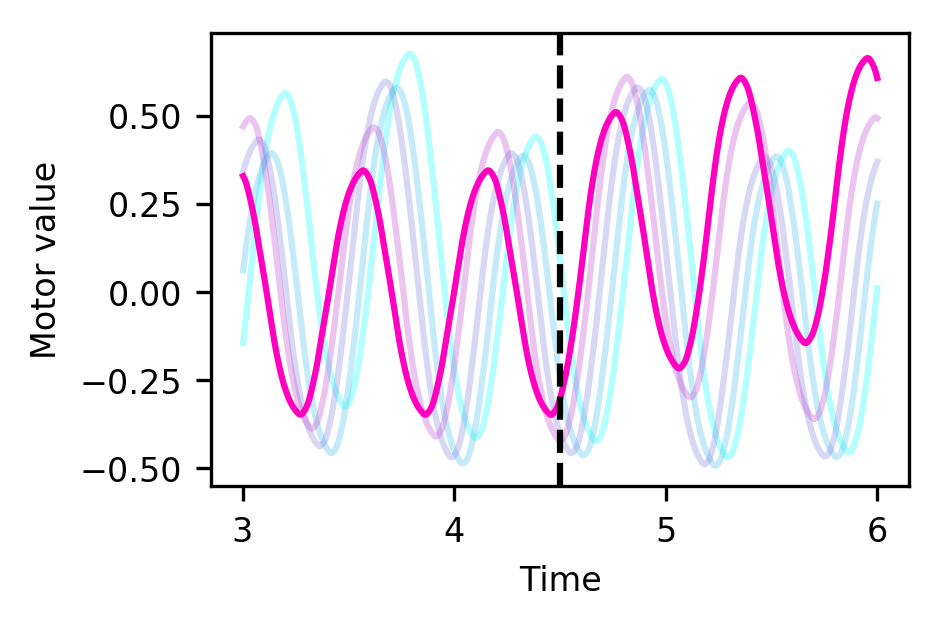

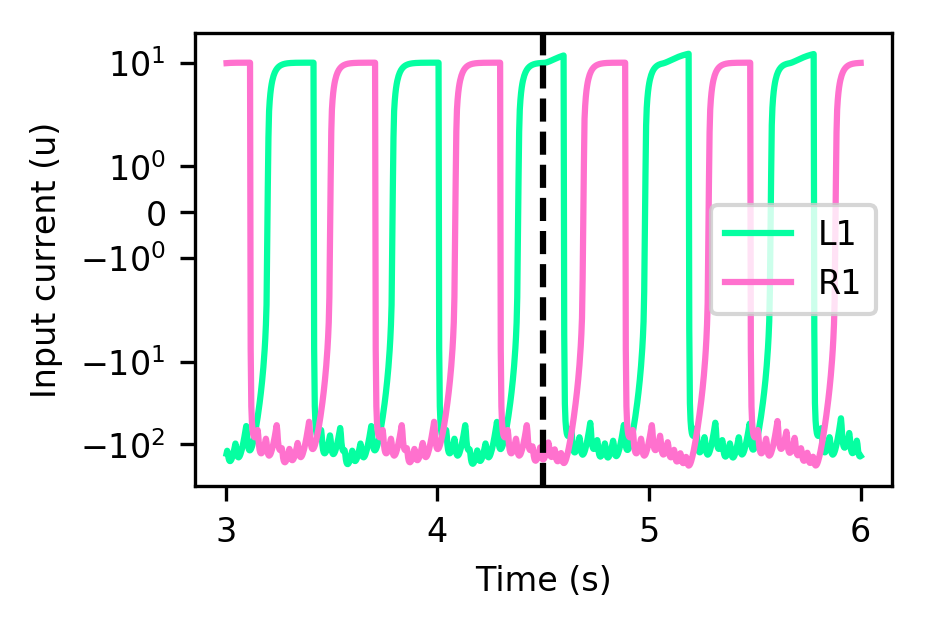

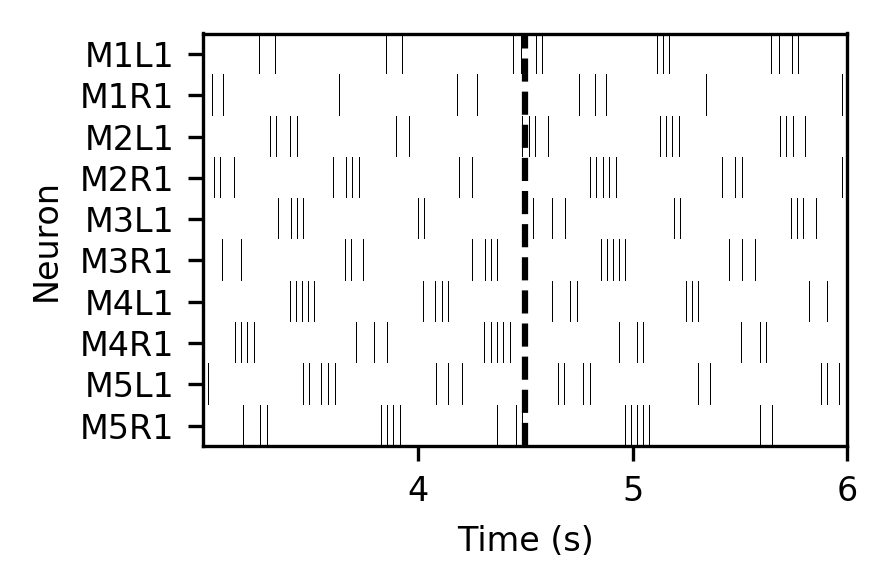

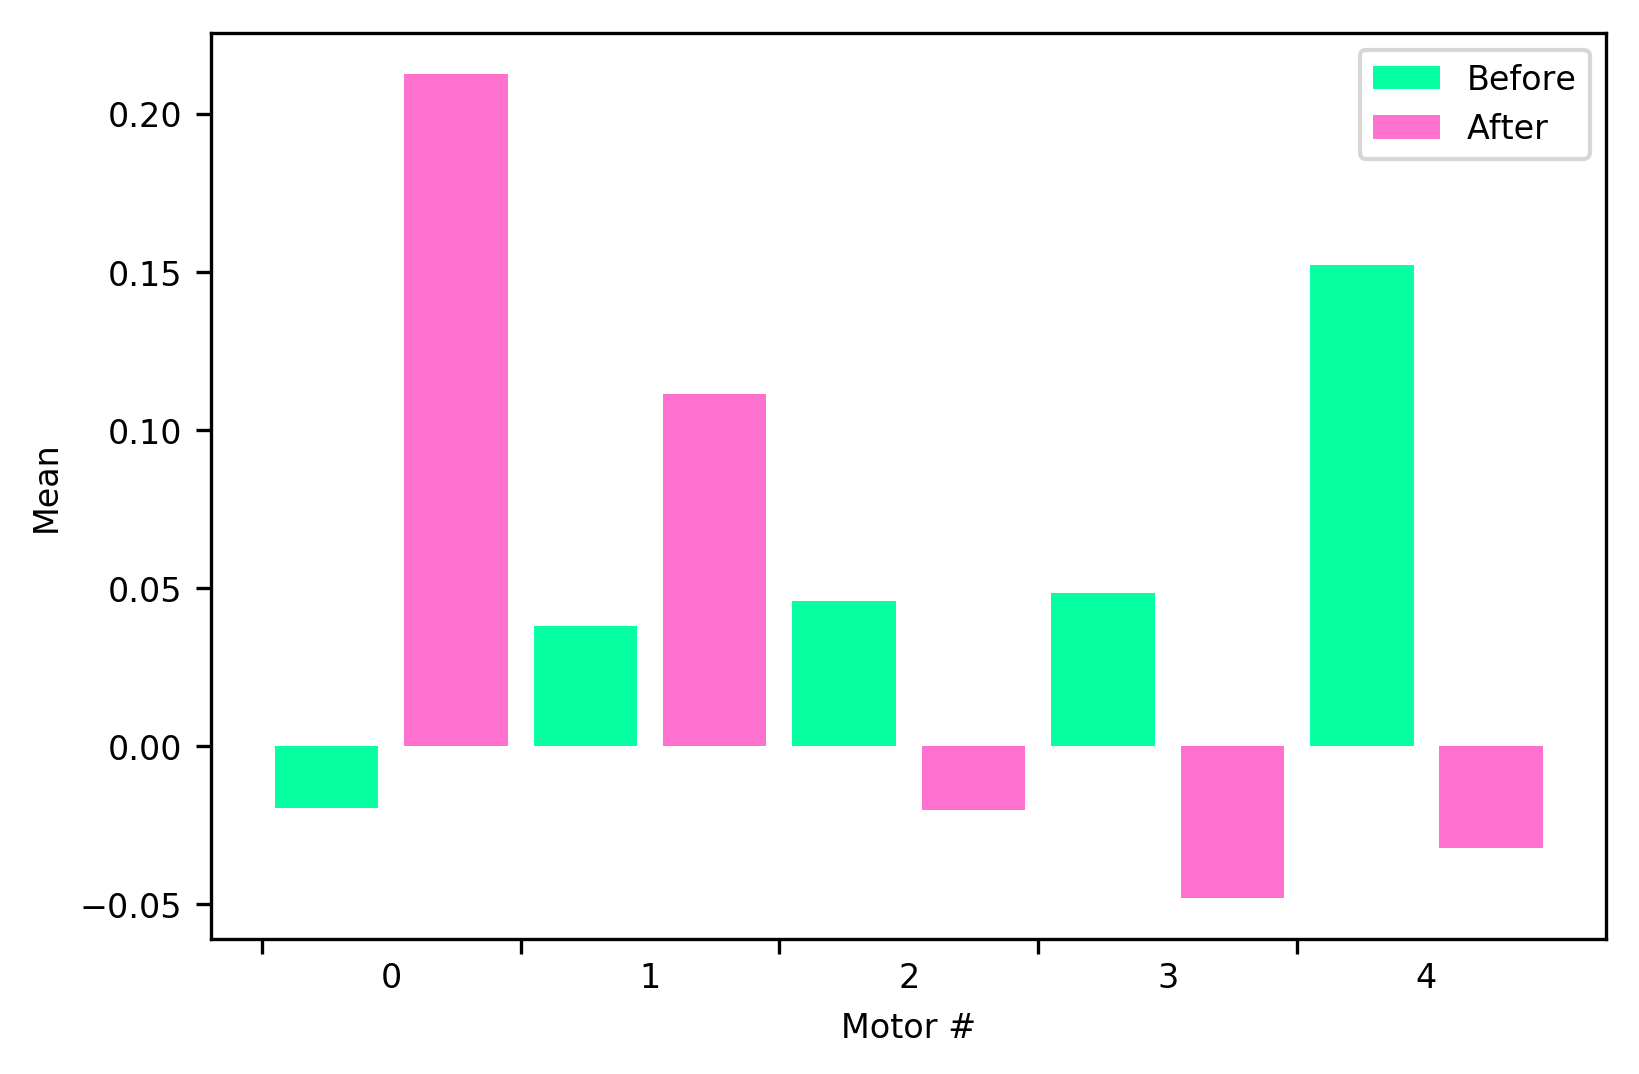

In [274]:
run_turning_exp(tau=0.05, alpha=0.1)

In [275]:
import matplotlib
matplotlib.rcParams["savefig.format"] = "pdf"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["font.size"] = 8
begin_time = 1
tslc = np.where(T>begin_time)

out = np.array(mn1.rets[1:])
T = sim.trange()
in_slc = np.where(T>insert_time)[0]
out_slc = np.where(np.logical_and(begin_time<T,T<insert_time))[0]
tslc = np.where(T>begin_time)[0]
fig,ax = plt.subplots(figsize=(2,1),dpi=300)
lcolors = ['tab:green', 'tab:orange','tab:purple','tab:brown','tab:cyan']
sc = 5
for i in np.arange(4,-1,-1):
    if i == 0:
        ax.plot(T[out_slc], out[out_slc,i]/sc,color=lcolors[i])
        ax.plot(T[in_slc], out[in_slc,i]/sc,color=lcolors[i])
    else:
        ax.plot(T[tslc], out[tslc,i].squeeze()/sc,color=colors[i],alpha=0.3)
ax.axvline(insert_time,color='r', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Motor value')
fig.savefig('./figures/2k_inhib.pdf')


before_mean = []
after_mean = []
for i in range(modules):
    b = out[out_slc,i]/sc
    a = out[in_slc,i]/sc
    before_mean.append(np.mean(b))
    after_mean.append(np.mean(a))
fig,ax = plt.subplots()
M_r = np.arange(modules)
ax.bar(M_r*2, before_mean)
ax.bar(M_r*2+1, after_mean)
ax.set_xticks(M_r*2+0.5,minor=True)
ax.set_xticks(M_r*2-0.5)
ax.tick_params(axis='x',which='minor',bottom=False)
ax.tick_params(axis='x',which='major',labelbottom=False)
ax.set_xticklabels(M_r,minor=True)
ax.legend(['Before','After'])
ax.set_xlabel('Motor #')
ax.set_ylabel('Mean')
savefig(fig,'motor_activation_turning')

NameError: name 'mn1' is not defined

In [ ]:
spike1 = [sim.data[probes1[i]['spikes']] for i in range(len(probes1))]

labels = ['M{}{}{}']
it = list(range(N))
it = [0,1,2,3,4,5]
labels = []
    
ims = []
for i in it:
    ims.append(spike1[i][np.ix_(tslc,[0,4])])
    labels.extend(['M%iL1'% (i+1),'M%iR1'%(i+1)])
fig,axs = plt.subplots(figsize=(6,2))
ims = np.hstack(ims).T
print(ims.shape)
bt = T[tslc][0]
et = T[tslc][-1]
bi = -0.5
ei = ims.shape[0]-0.5
im = axs.matshow(ims,aspect='auto',extent=[bt,et,ei,bi])
# im = axs[0].matshow(ims,aspect='auto')

axs.set_xlabel('Steps')
axs.set_ylabel('Neuron')
axs.set_yticks(range(len(it)*2))
axs.xaxis.tick_bottom()
axs.set_yticklabels(labels)
axs.title.set_text('Neuron activation')
cbar = plt.colorbar(im,ax=axs)
cbar.ax.title.set_text('Hz')
labels = ['M1L1', 'M1R1','M2L1','M2R1','M3L1','M3R1']
plt.tight_layout()
savefig(fig,'neuron_activation_turning')

In [99]:
mm = np.array(
[
    [0,0,0,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0]
])
lr = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,1,0],
    [0,0,0,0]
])
imm = np.array([
    [0.02,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
])
model,mn, probes = generate_nengo_model(mm,
    lr,
    imm, 
    modules=5, 
    generate_probes=True,
    crop=None,
    defaults={
        'neuron_type': nengo.AdaptiveLIF(
            tau_n=1, 
            inc_n=0.5, 
            tau_rc=0.02, 
            tau_ref=0.02, 
            min_voltage=0, 
            amplitude=1)
    },
    motor_filter=nengo.Alpha(0.05),
    motor_probe_filter=nengo.Alpha(0.05),
    w_synapse=nengo.Alpha(0.02), 
    imm_synapse=nengo.Alpha(0.05),
    inp_conn_type=None,
    tau=0.05,
    alpha=0.1
)
sim = run_simple(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [100]:
adj = create_adj_matrix(mm,lr,imm,modules=5)

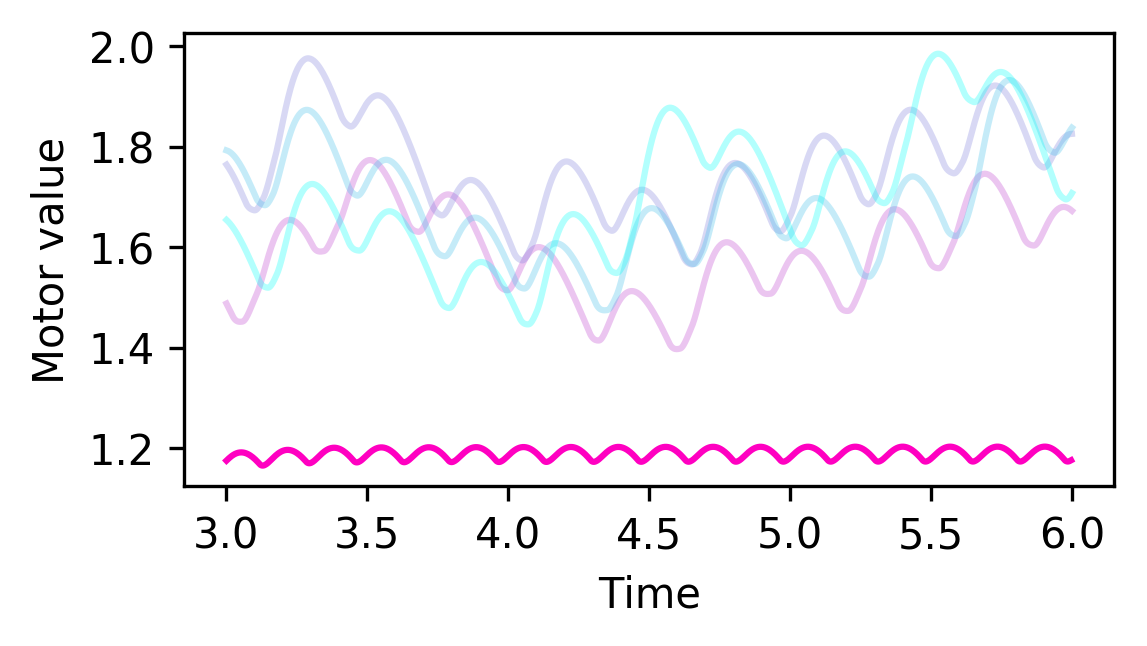

In [107]:
begin_time=3
fig, ax = plt.subplots(figsize=(4,2),dpi=300)
plot_output_compliance(ax, mn,begin_time,sim,it=[0],insert_time=None,lcolors=module_colors)
# ax2 = ax.twinx()
# ax.set_ylabel('MC1')
plot_output_compliance(ax, mn,begin_time,sim,it=[1,2,3,4],insert_time=None,lcolors=module_colors)
savefig(fig,'s2_leech_heartbeat_output')



(-22.2575, 3.7575000000000003)


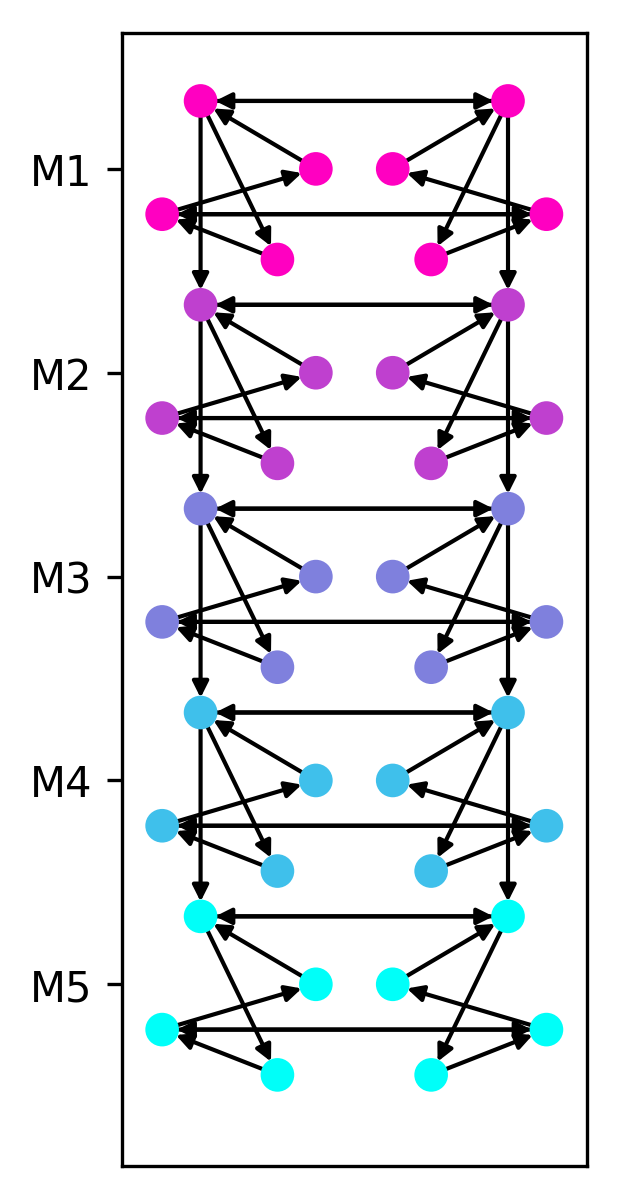

In [108]:
fig,ax = plt.subplots(figsize=(2,5),dpi=300)
draw_graph(ax,adj,modules=5,colors=module_colors, with_labels=False,node_size=50,arrowsize=8)
print(ax.get_ylim())
ax.set_ylim(-20-2,3)
savefig(fig,'s2_leech_heartbeat_structure')
